In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sorts = [
    "selection",
    "bubble",
    "bubble-iverson-1",
    "bubble-iverson-2",
    "insertion",
    "bin-insertion",
    "counting",
    "radix",
    "merge",
    "quick",
    "heap",
    "shell-ciura",
    "shell"
]

arrays = [
    "small-range",
    "big-range",
    "almost-sorted",
    "reversed"
]

In [3]:
data = pd.read_csv('../data/time-small.csv', sep=';', header=None)
data.columns = ['sort', 'array', 'size', 'time']

In [4]:
def print_sort(data, sort):
    sort_df = data[data['sort'] == sort]
    plt.figure(figsize=(20, 20))
    for array in arrays:
        df = sort_df[sort_df['array'] == array]
        plt.plot(df['size'], df['time'], label=array)
    plt.title(sort)
    plt.xlabel('Array Size')
    plt.xticks(sort_df['size'].unique())
    plt.ylabel('Time (nanoseconds)')
    plt.legend(labelcolor='black', prop={'size': 15})

In [5]:
def print_array(data, array):
    array_df = data[data['array'] == array]
    plt.figure(figsize=(20, 20))
    for sort in sorts:
        df = array_df[array_df['sort'] == sort]
        plt.plot(df['size'], df['time'], label=sort)
    plt.title(array)
    plt.xlabel('Array Size')
    plt.xticks(array_df['size'].unique())
    plt.ylabel('Time (nanoseconds)')
    plt.legend(labelcolor='black', prop={'size': 15})

# Зависимость времени выполнения от размера массива
для размера массива от 100 до 4000, шаг 100

## По сортировкам


### 1. Выбором

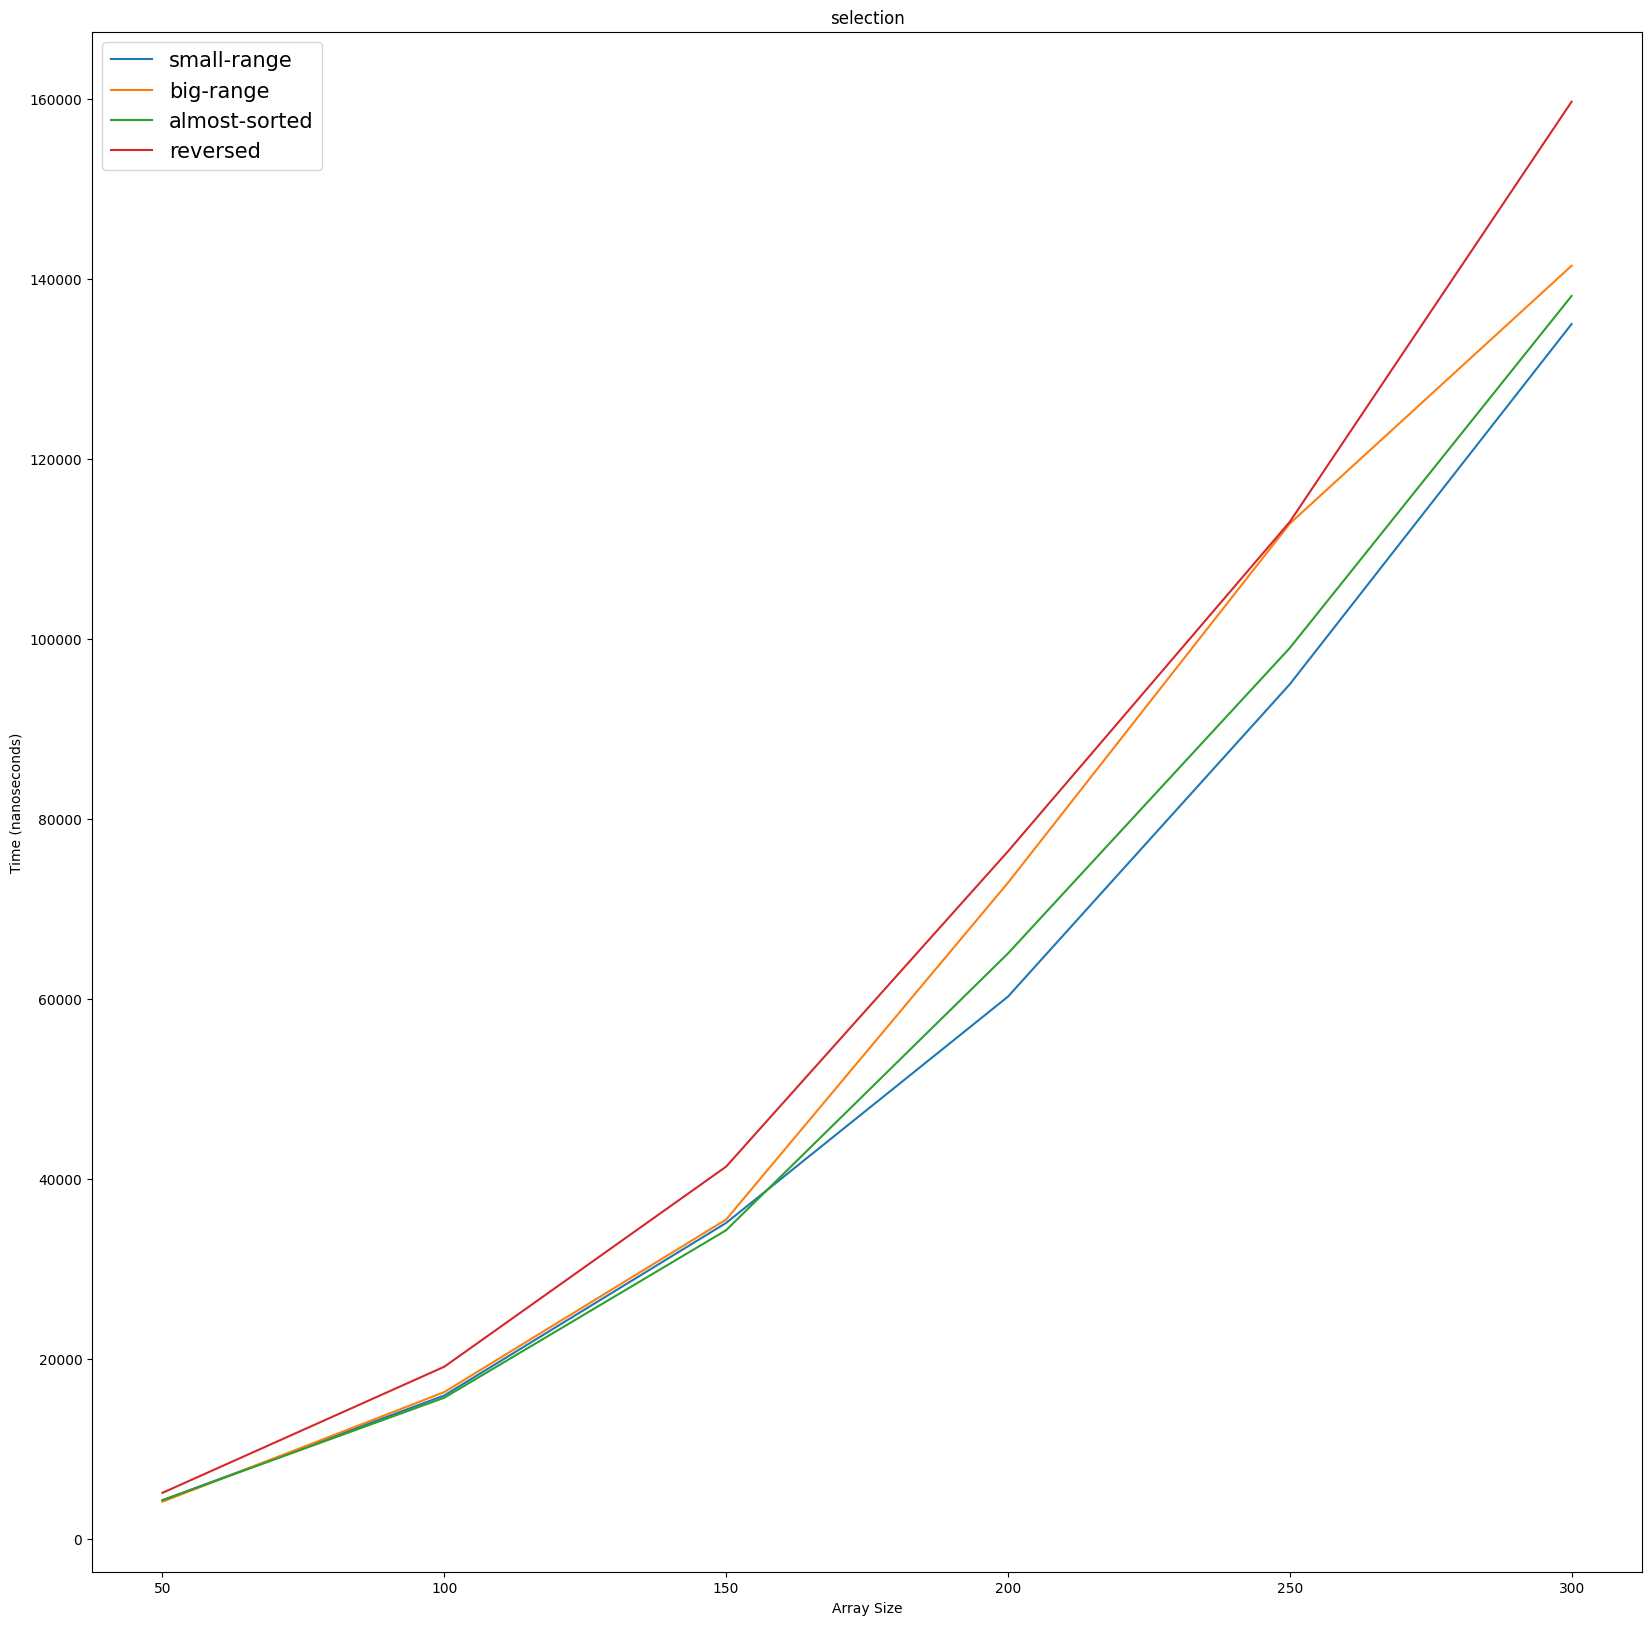

In [6]:
print_sort(data, sorts[0])

**Вывод:** для массивов небольшого размера сортировка показывает себя примерно одинаково для предложенных типов массива, но всё же на `reversed` и `big range` массивах чуть хуже, потому что мы чаще меняем минимальный элемент (предположение)

### 2. Пузырьком

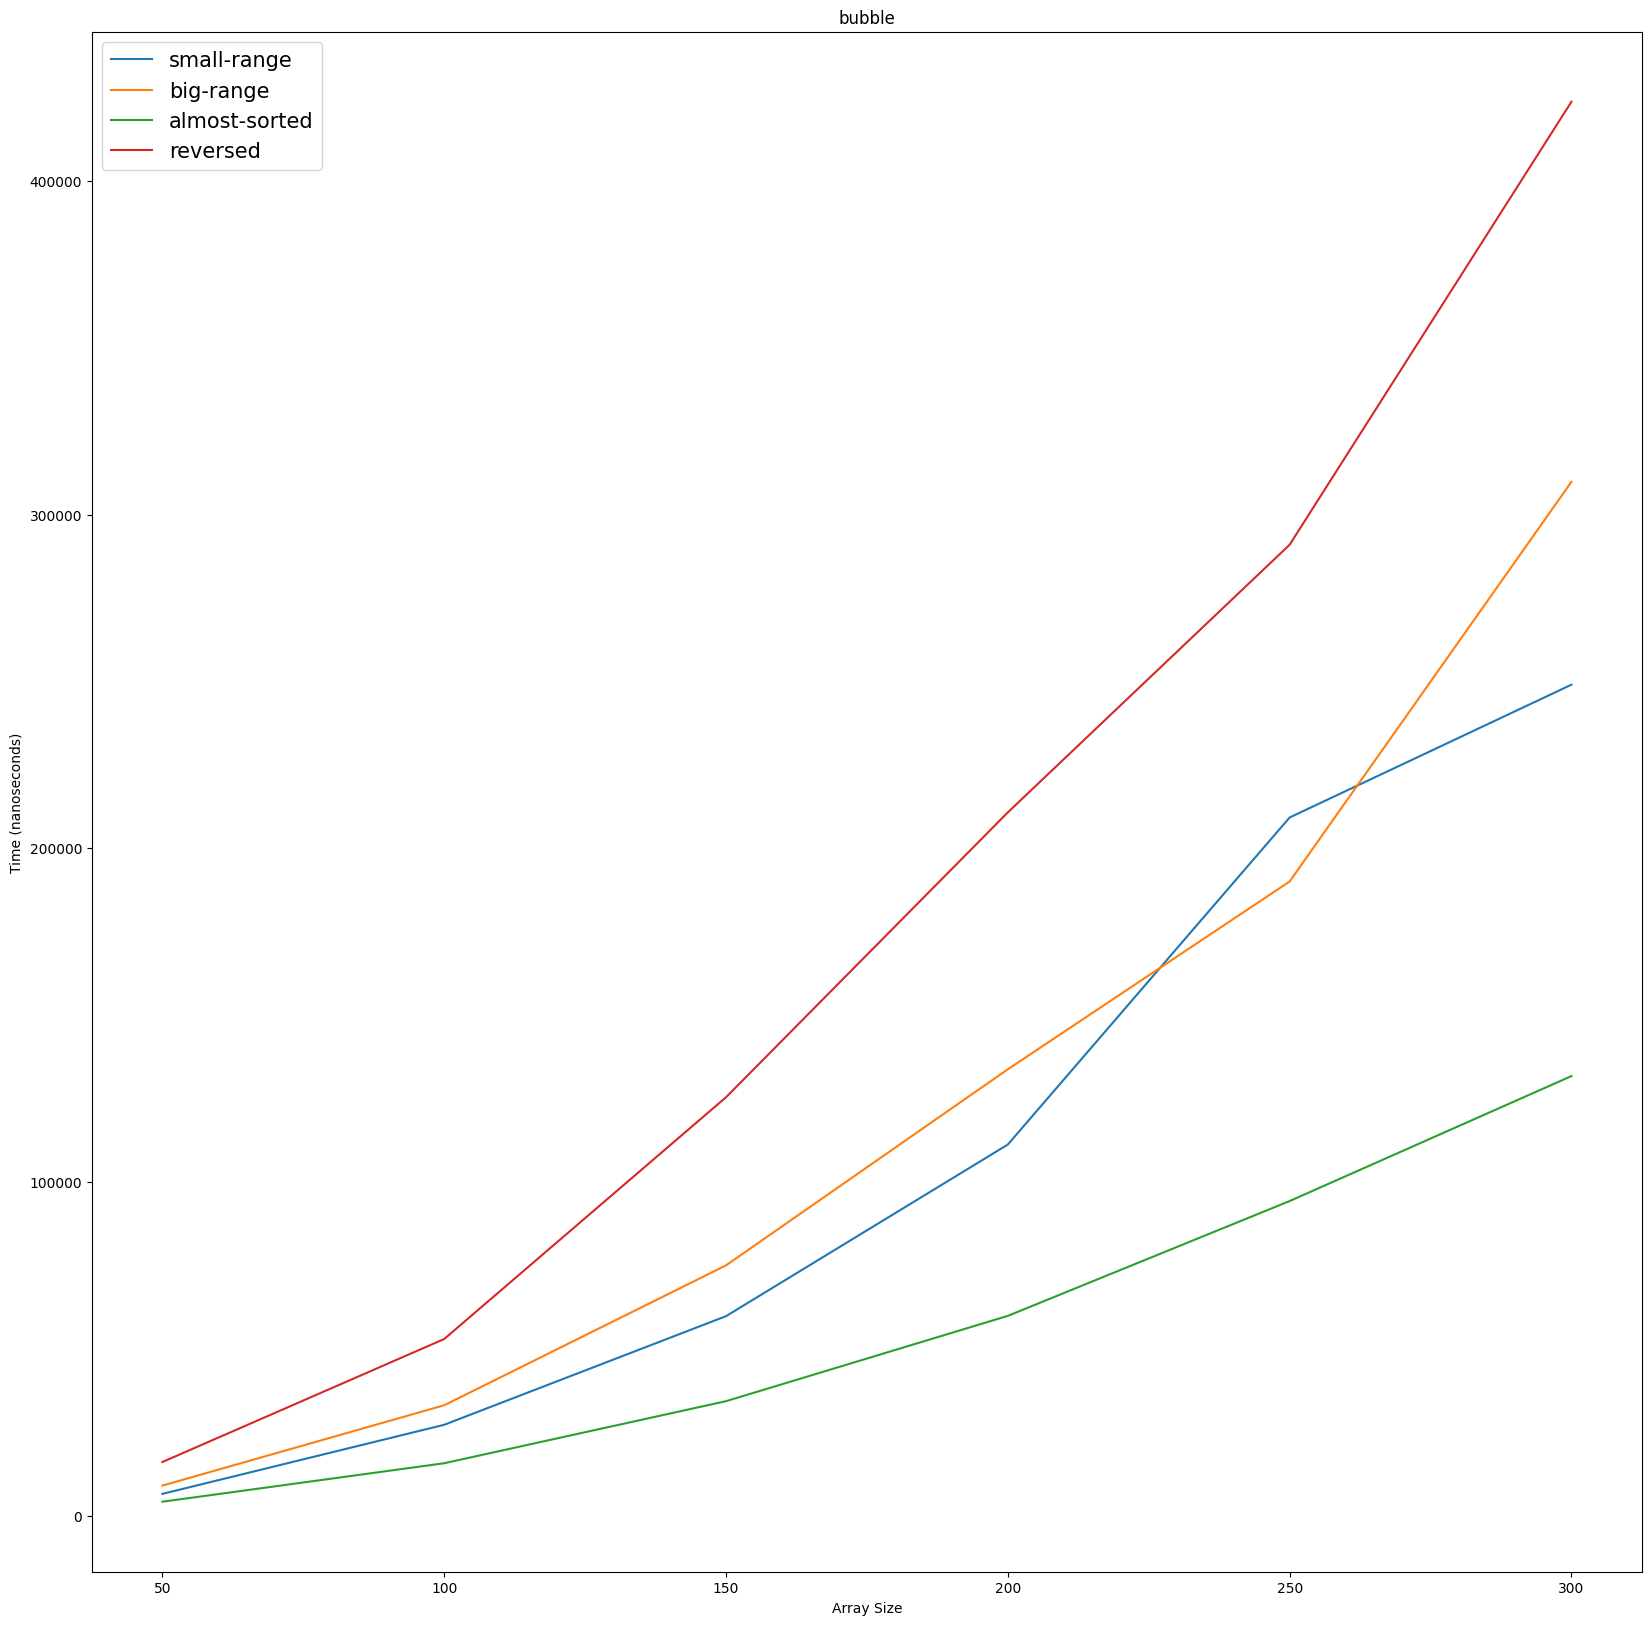

In [7]:
print_sort(data, sorts[1])

**Вывод:** видно, что алгоритм чувствителен к порядку элементов, так как от этого зависит количество свопов. Например, худший результат для `reversed` массива, потому что мы каждый раз свопаем элемент со всеми элементами меньше. Наоборот, `alomost sorted` быстрее всех отсортировался, так как там минимальное количество свопов

### 3. Пузырьком с условием Айверсона 1

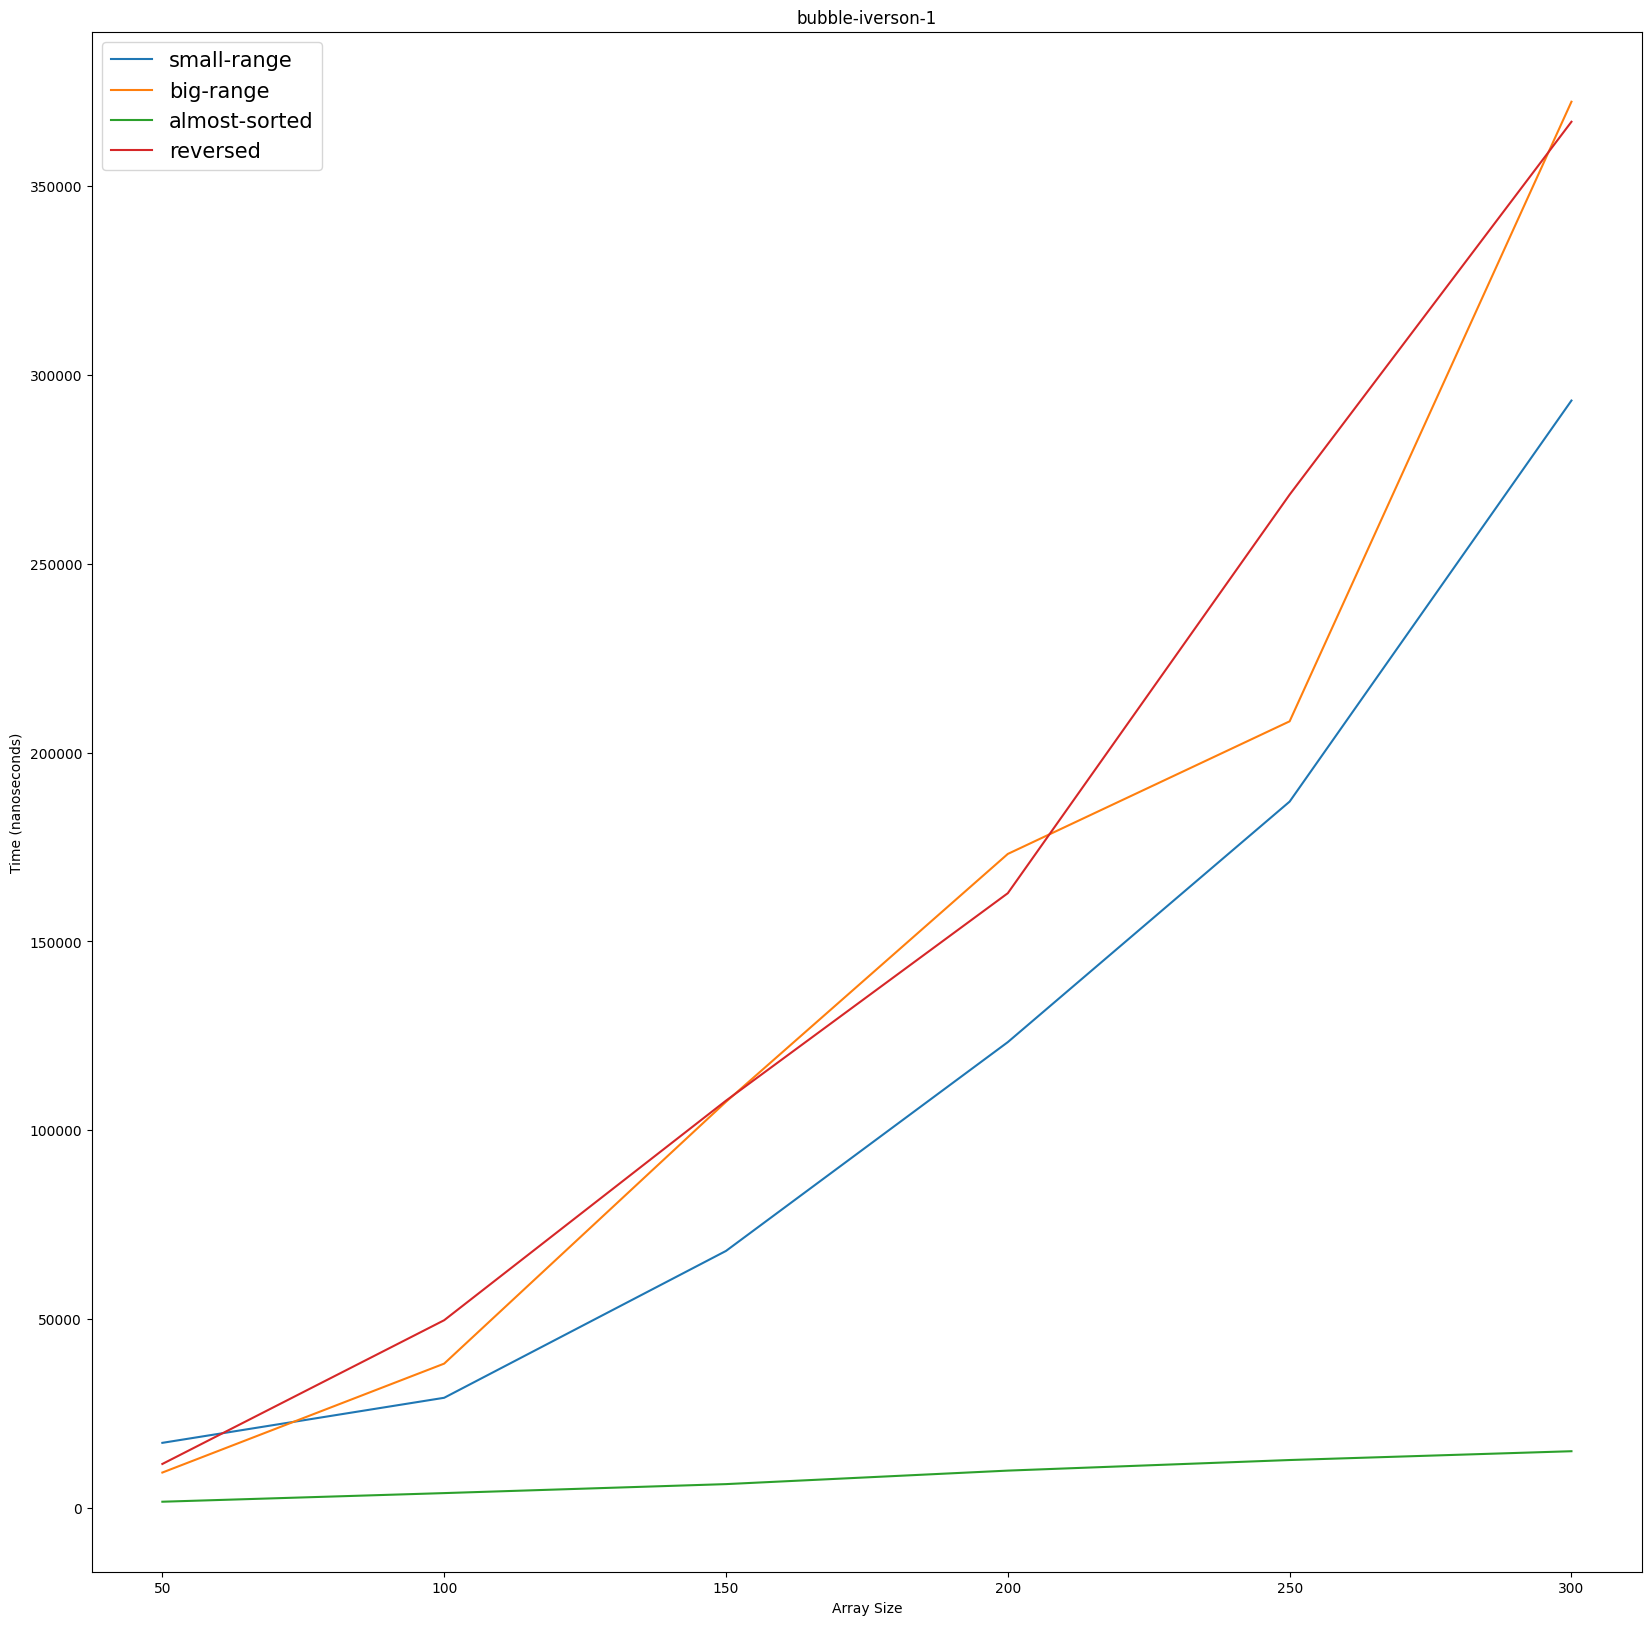

In [8]:
print_sort(data, sorts[2])

**Вывод:** в дополнение к аргументу из предыдущего пункта стоит отметить значительную оптимизацию для `almost sorted` благодаря флагу с проверкой Айверсона

### 4. Пузырьком с условием Айверсона 1 + 2

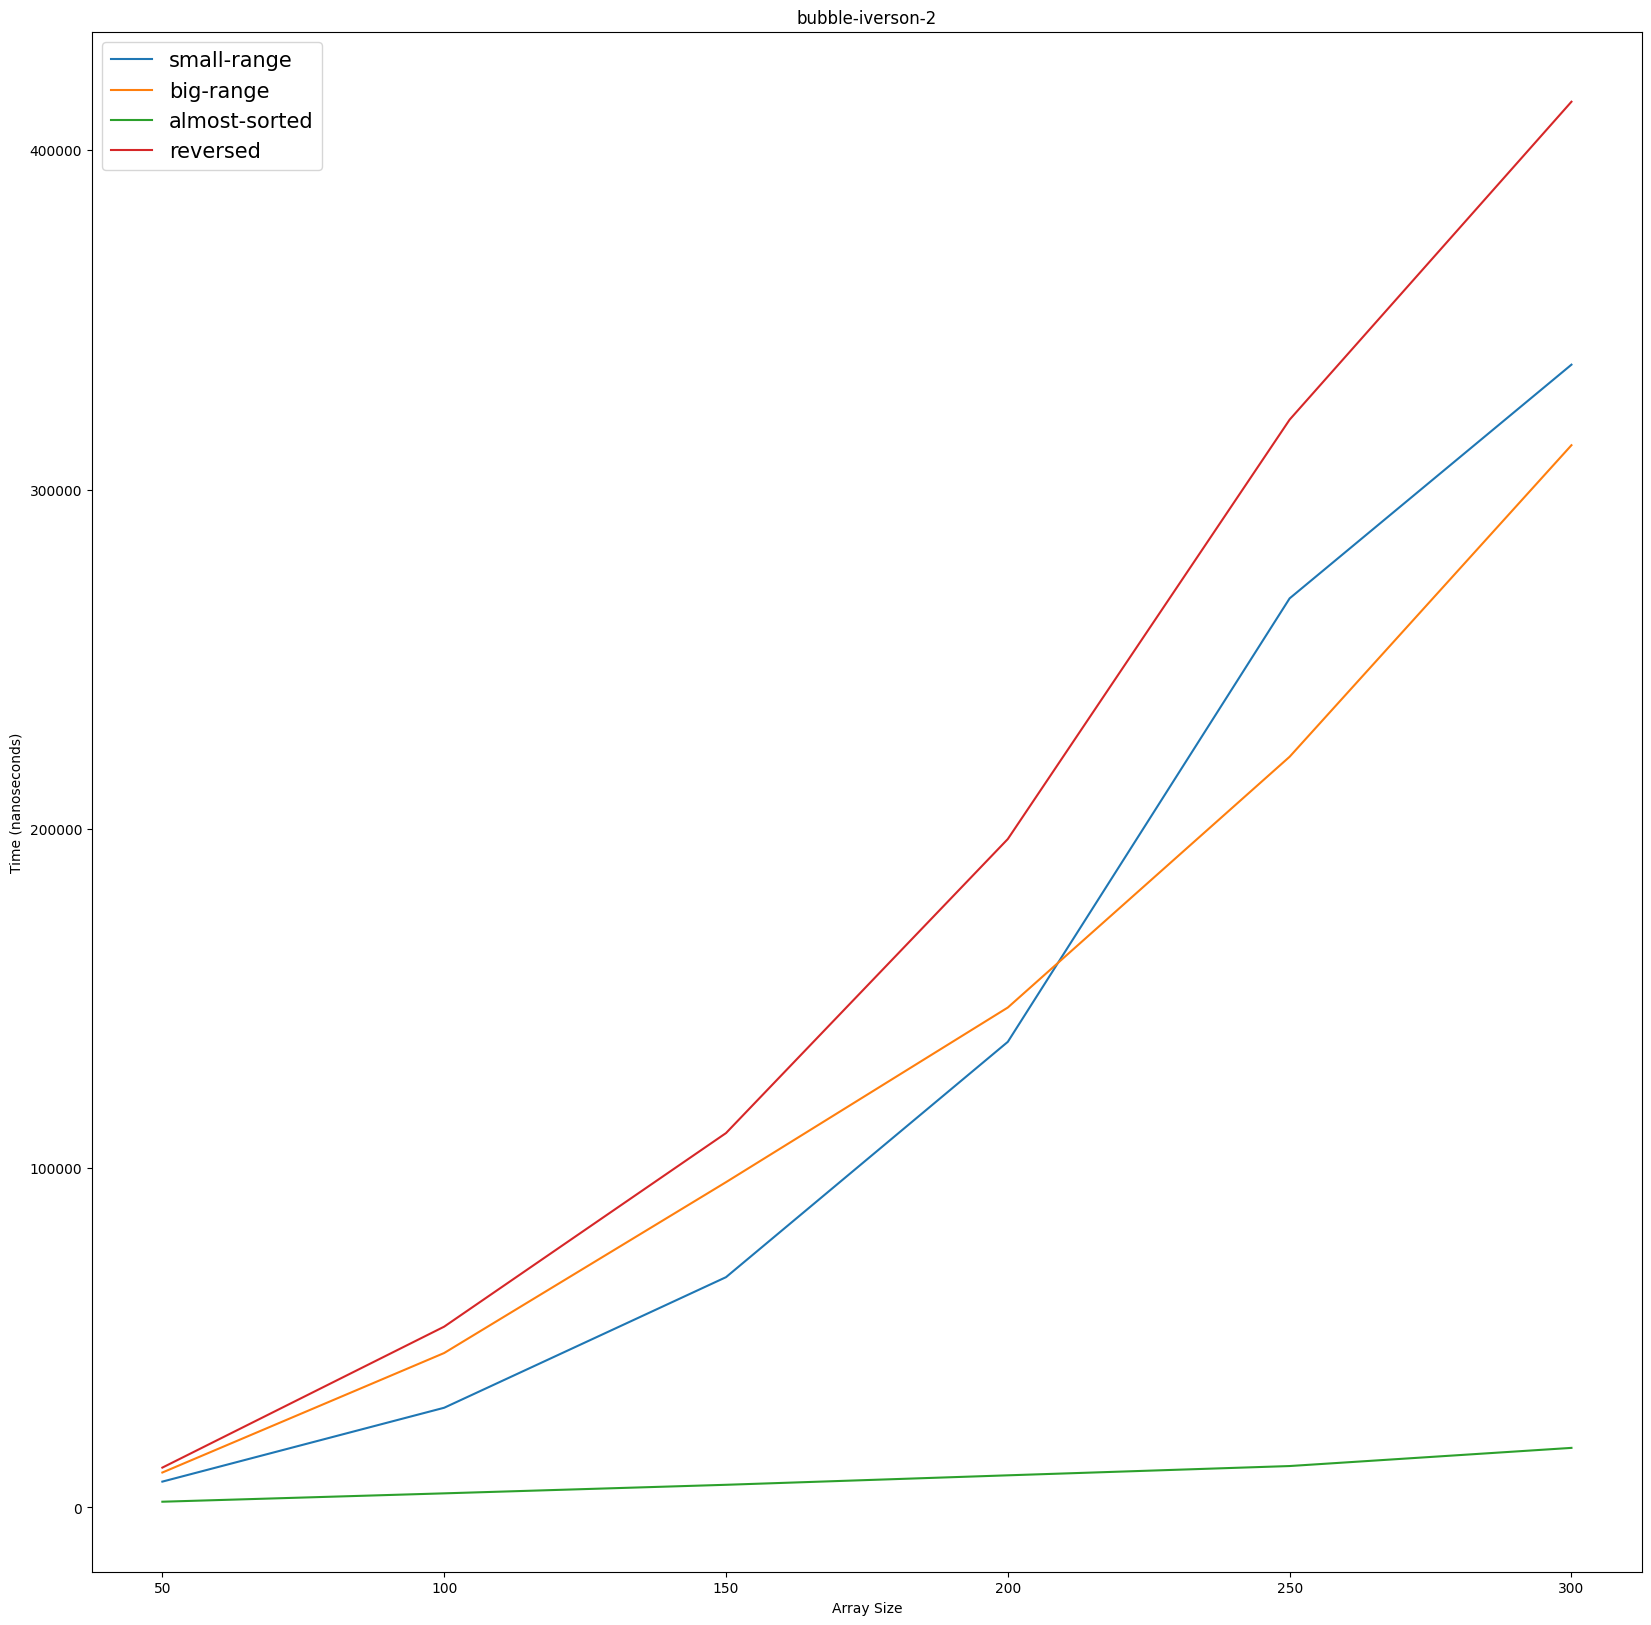

In [9]:
print_sort(data, sorts[3])

**Вывод:** кажется, что существенно дополнить предыдущий пункт нечем: улучшение для `almost sorted` есть благодаря первому условию

### 5. Простыми вставками

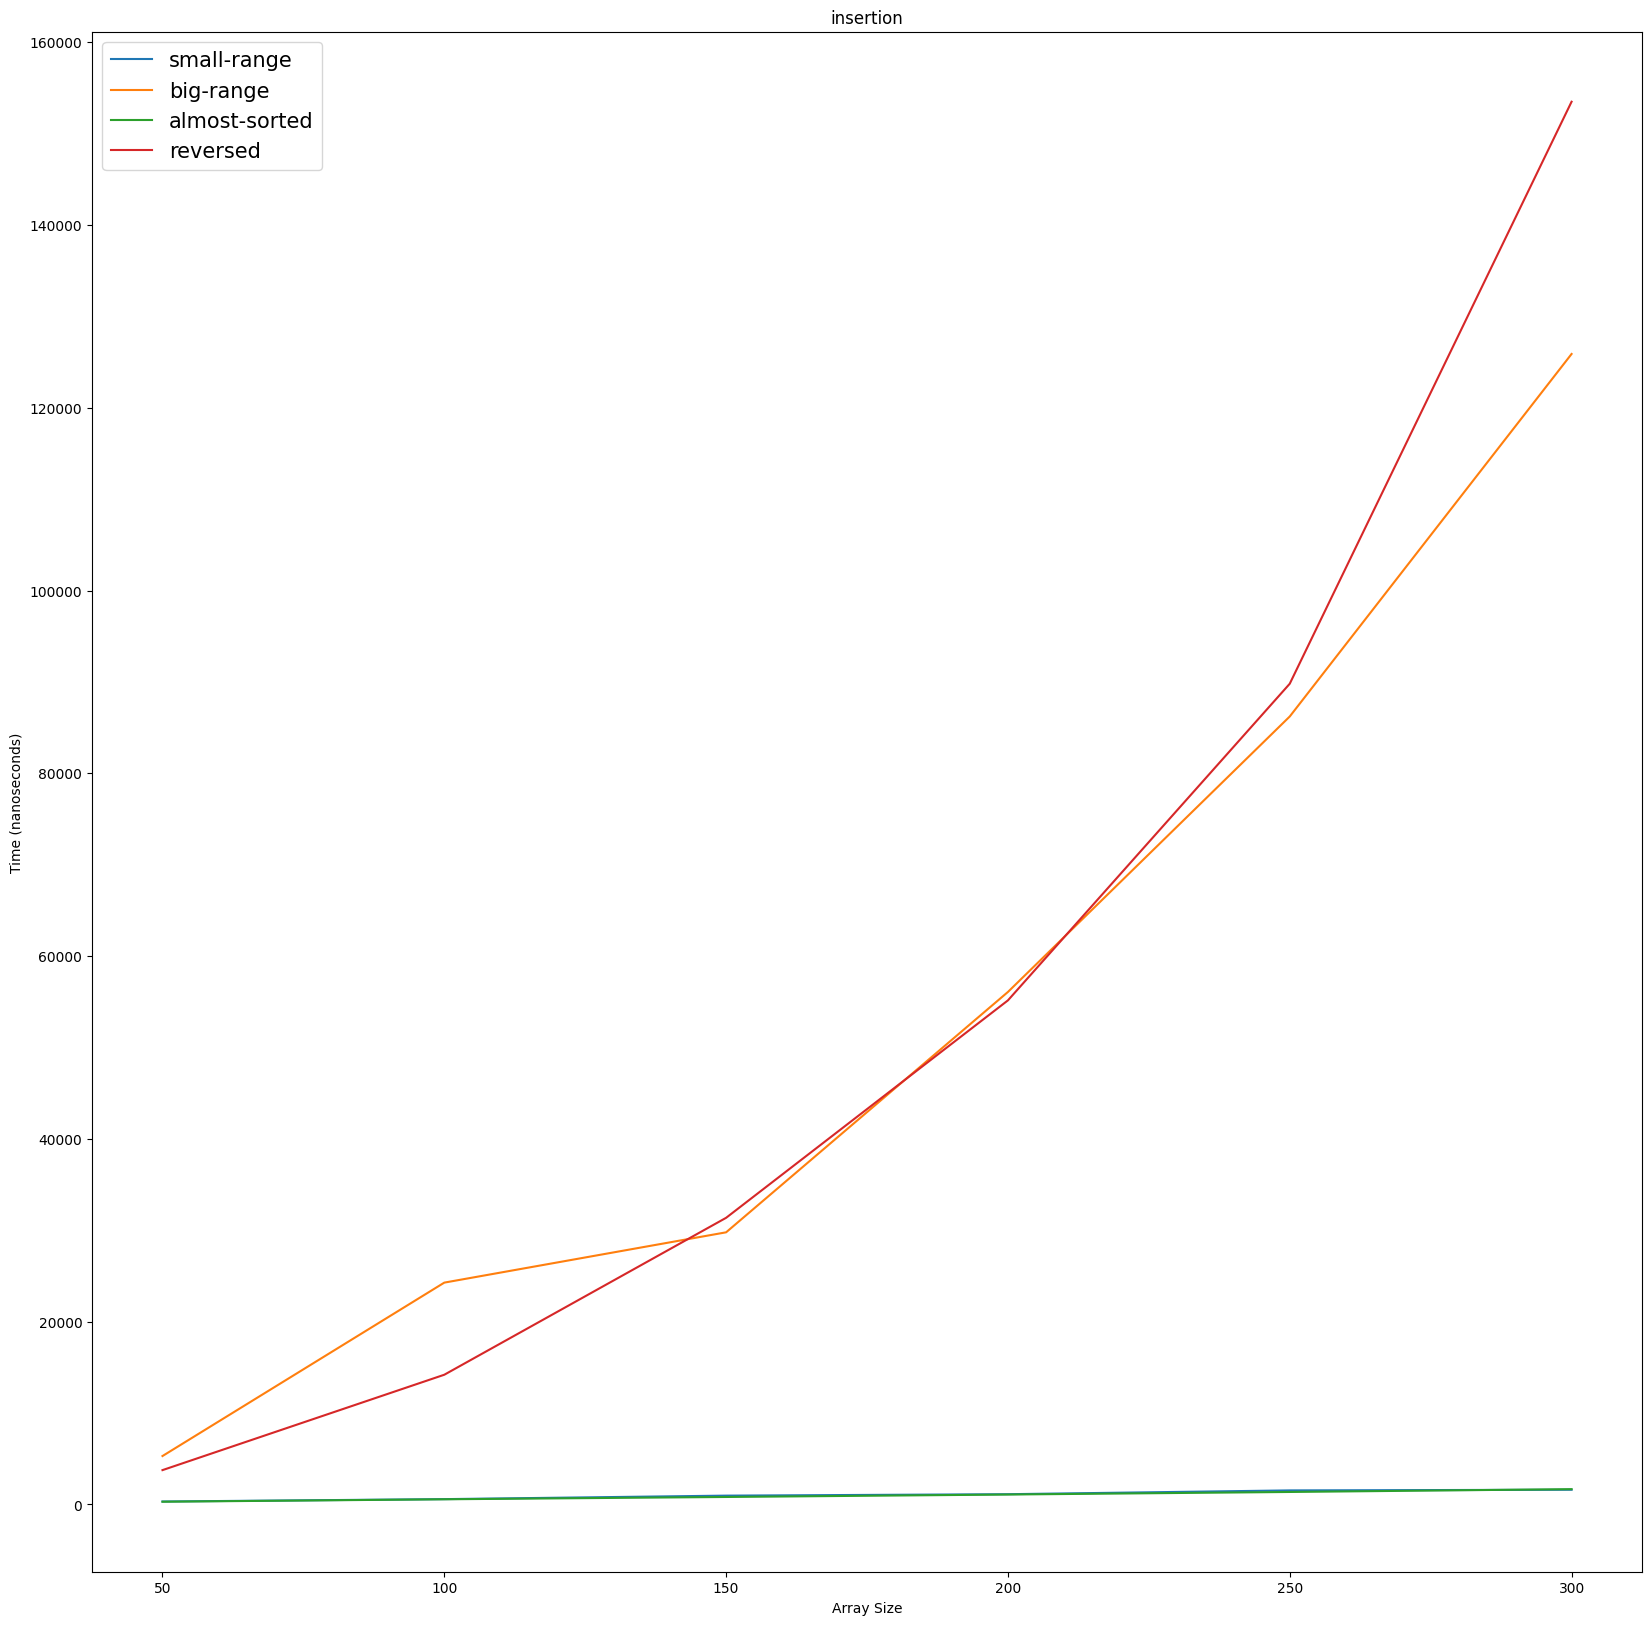

In [10]:
print_sort(data, sorts[4])

**Вывод:** (даже два)
* Для `alomost sorted` быстрое исполнение за счёт того, что мы делаем мало вставок с перемещением
* Для `small range` оптимизация за счёт того, что для сдвига условие строгое и мы не трогаем равные элементы

### 6. Бинарными вставками

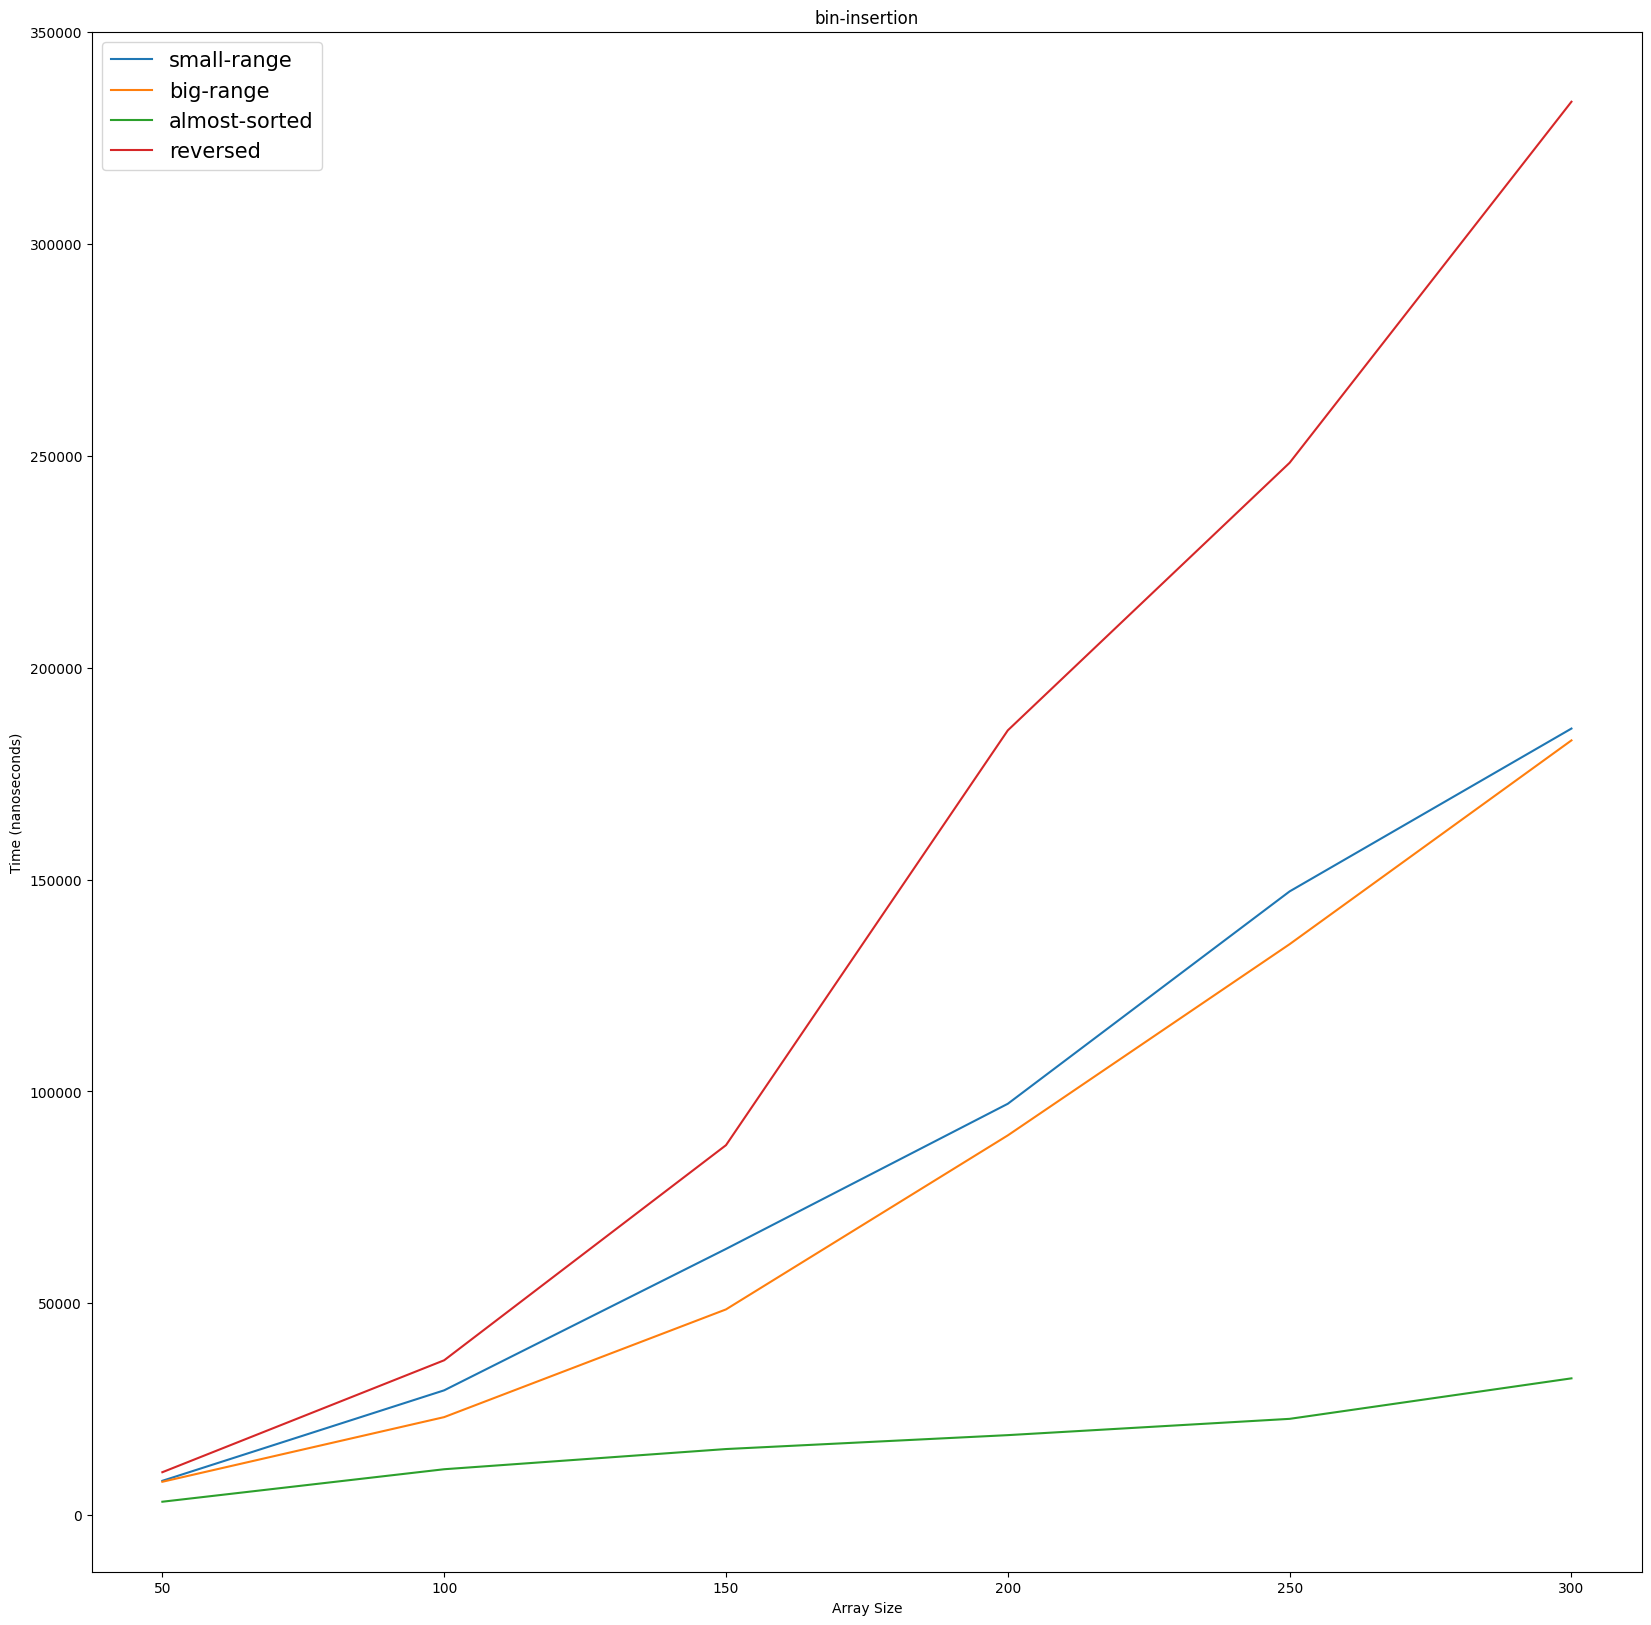

In [11]:
print_sort(data, sorts[5])

**Вывод:** как мне кажется, бинарный поиск стабилизировал расположение кривых относительно предыдущего пункта. Сама оптимизация поиска места вставки сгладила различие между `almost sorted` и остальными

### 7. Подсчётом

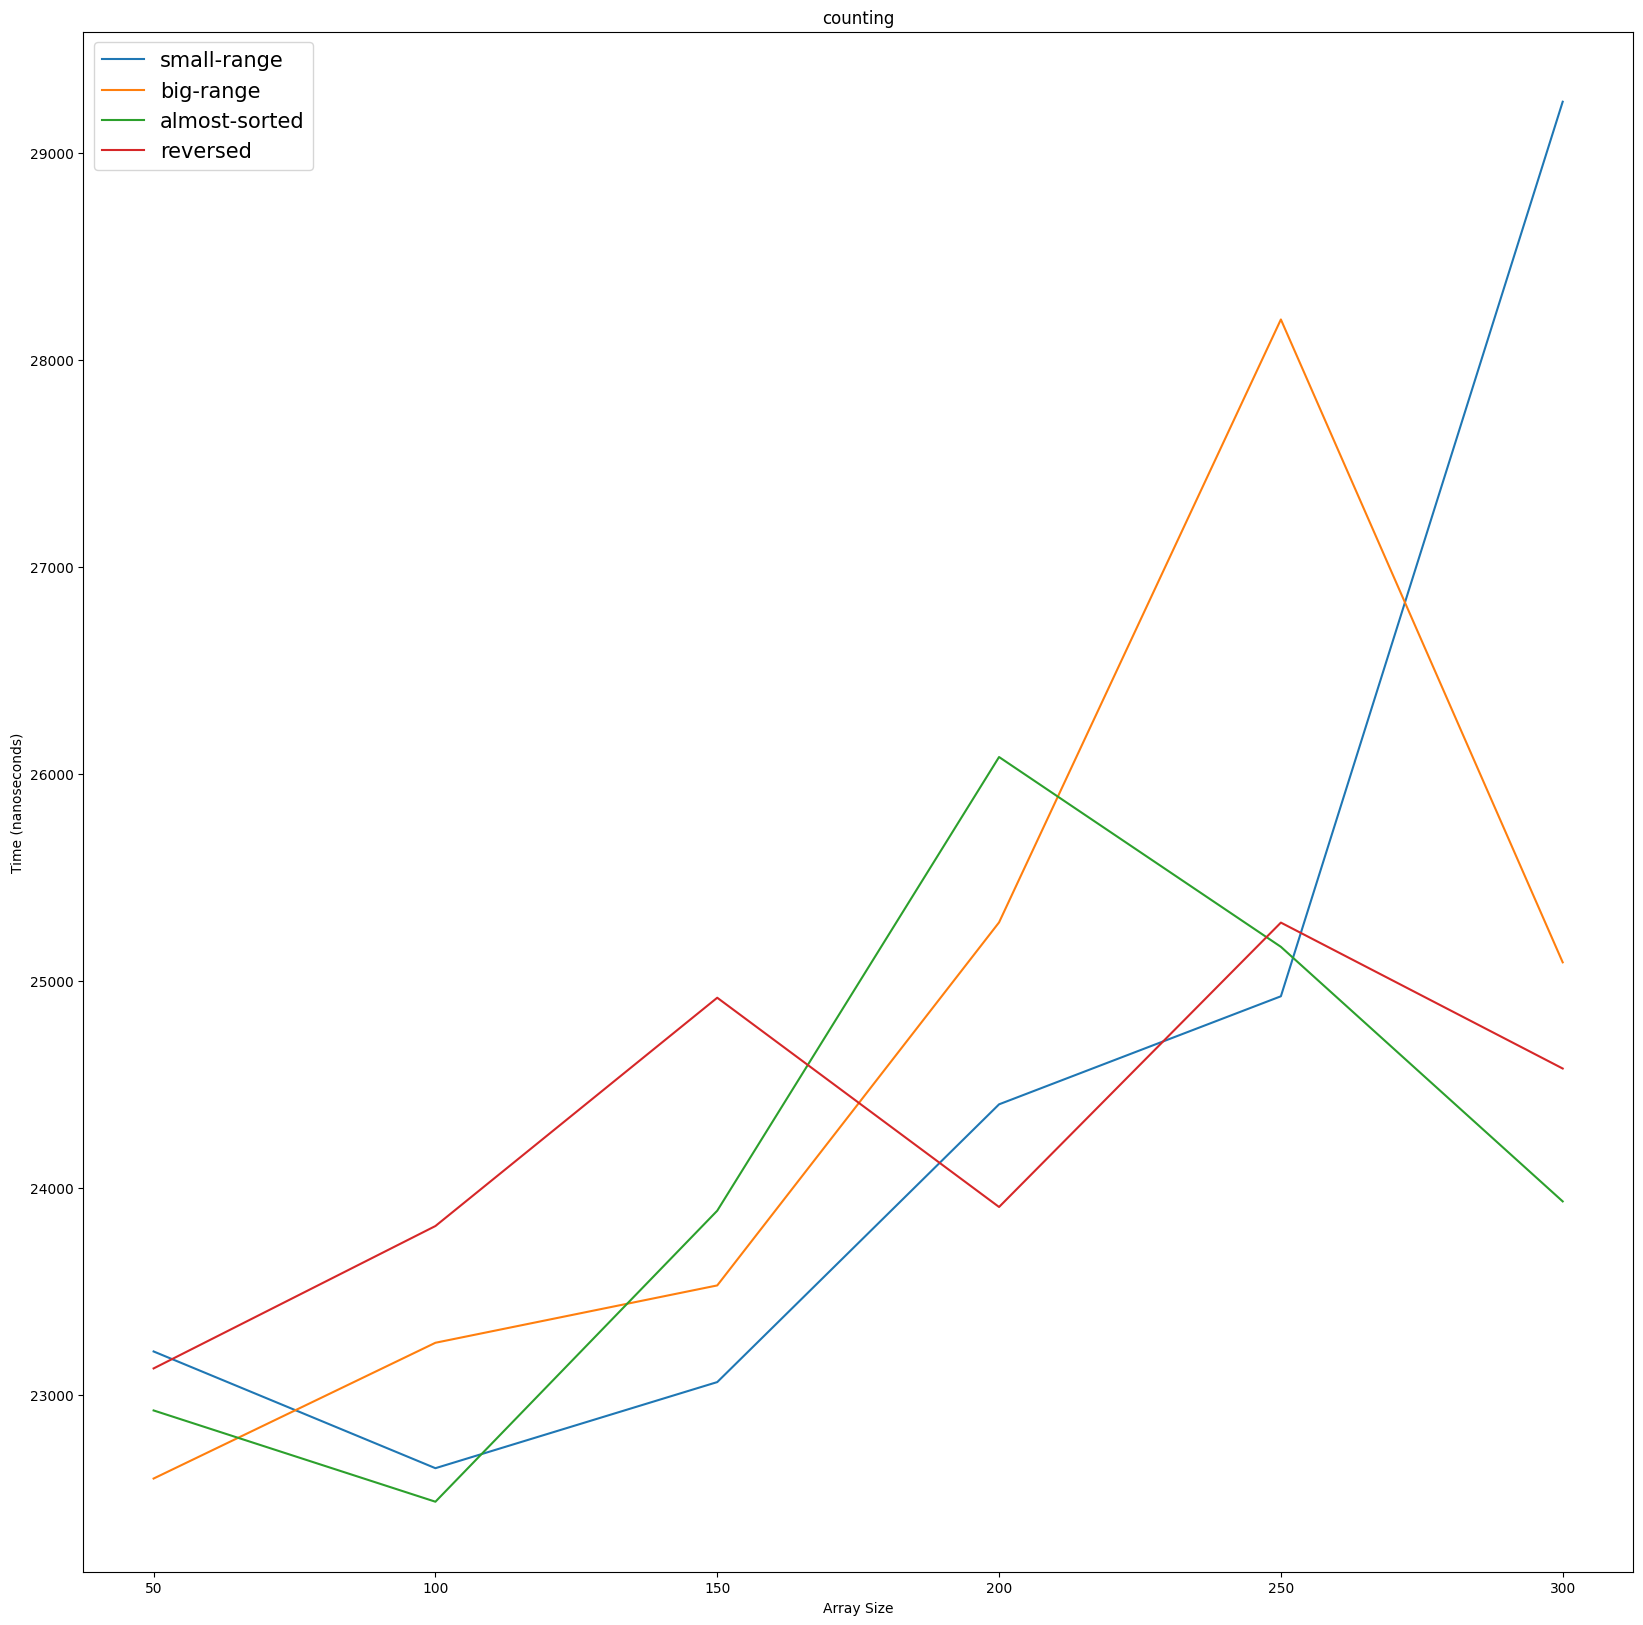

In [12]:
print_sort(data, sorts[6])

**Вывод:** графику совсем плохо( В теории должна быть линия

### 8. Цифровая

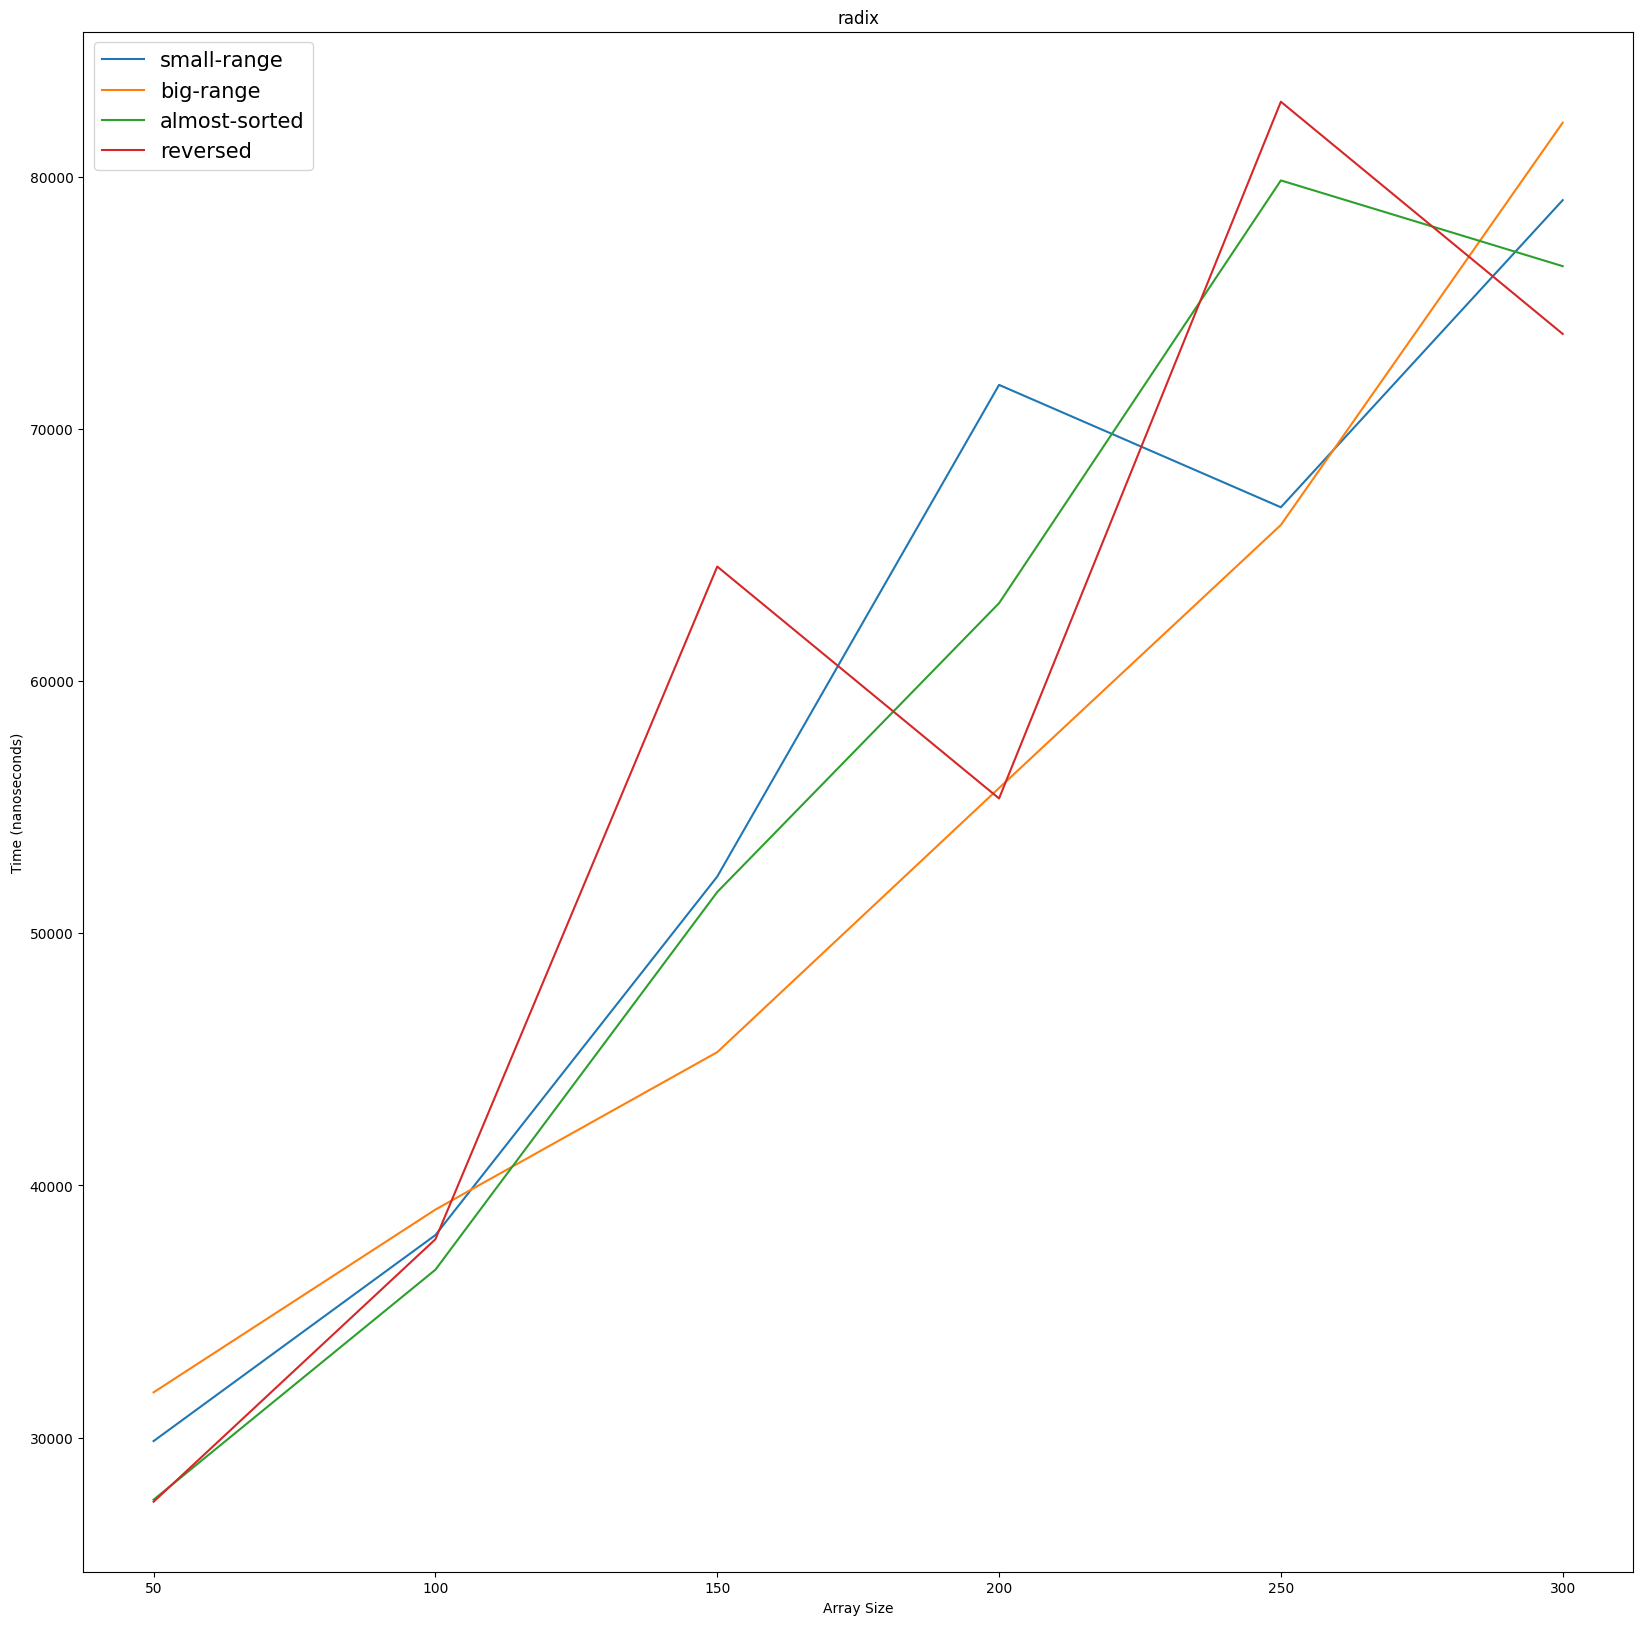

In [13]:
print_sort(data, sorts[7])

**Вывод:** Сортировка нечувствительна к порядку элементов, поэтому для всех массивов время сортировки примерно одинаково

### 9. Слиянием

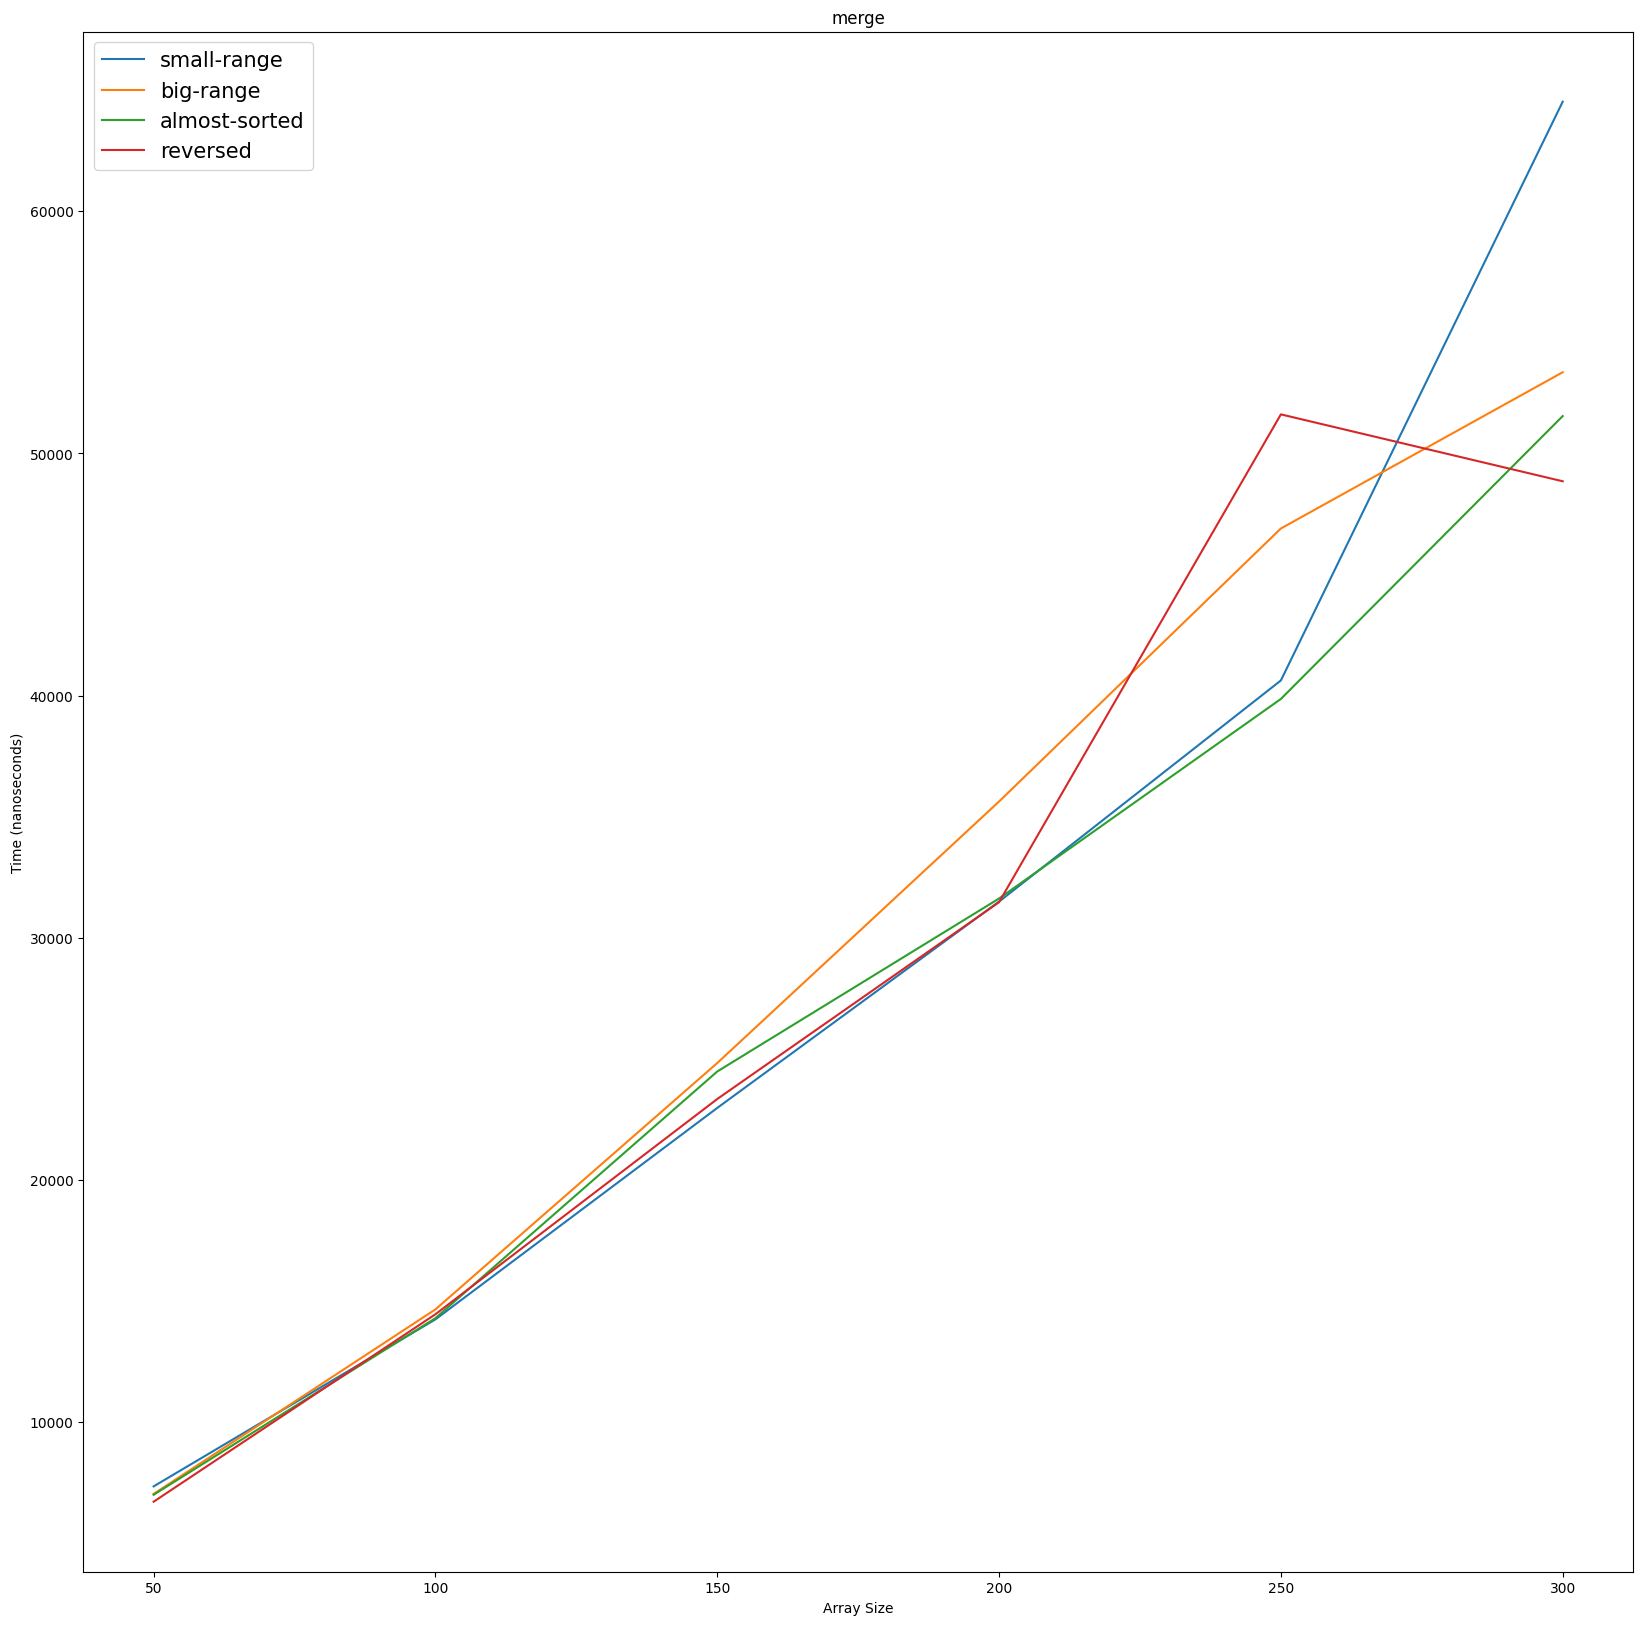

In [14]:
print_sort(data, sorts[8])

**Вывод:** по графику можно сделать вывод, что для `merge sort` порядок элементов не принципиален

### 10. Быстрая

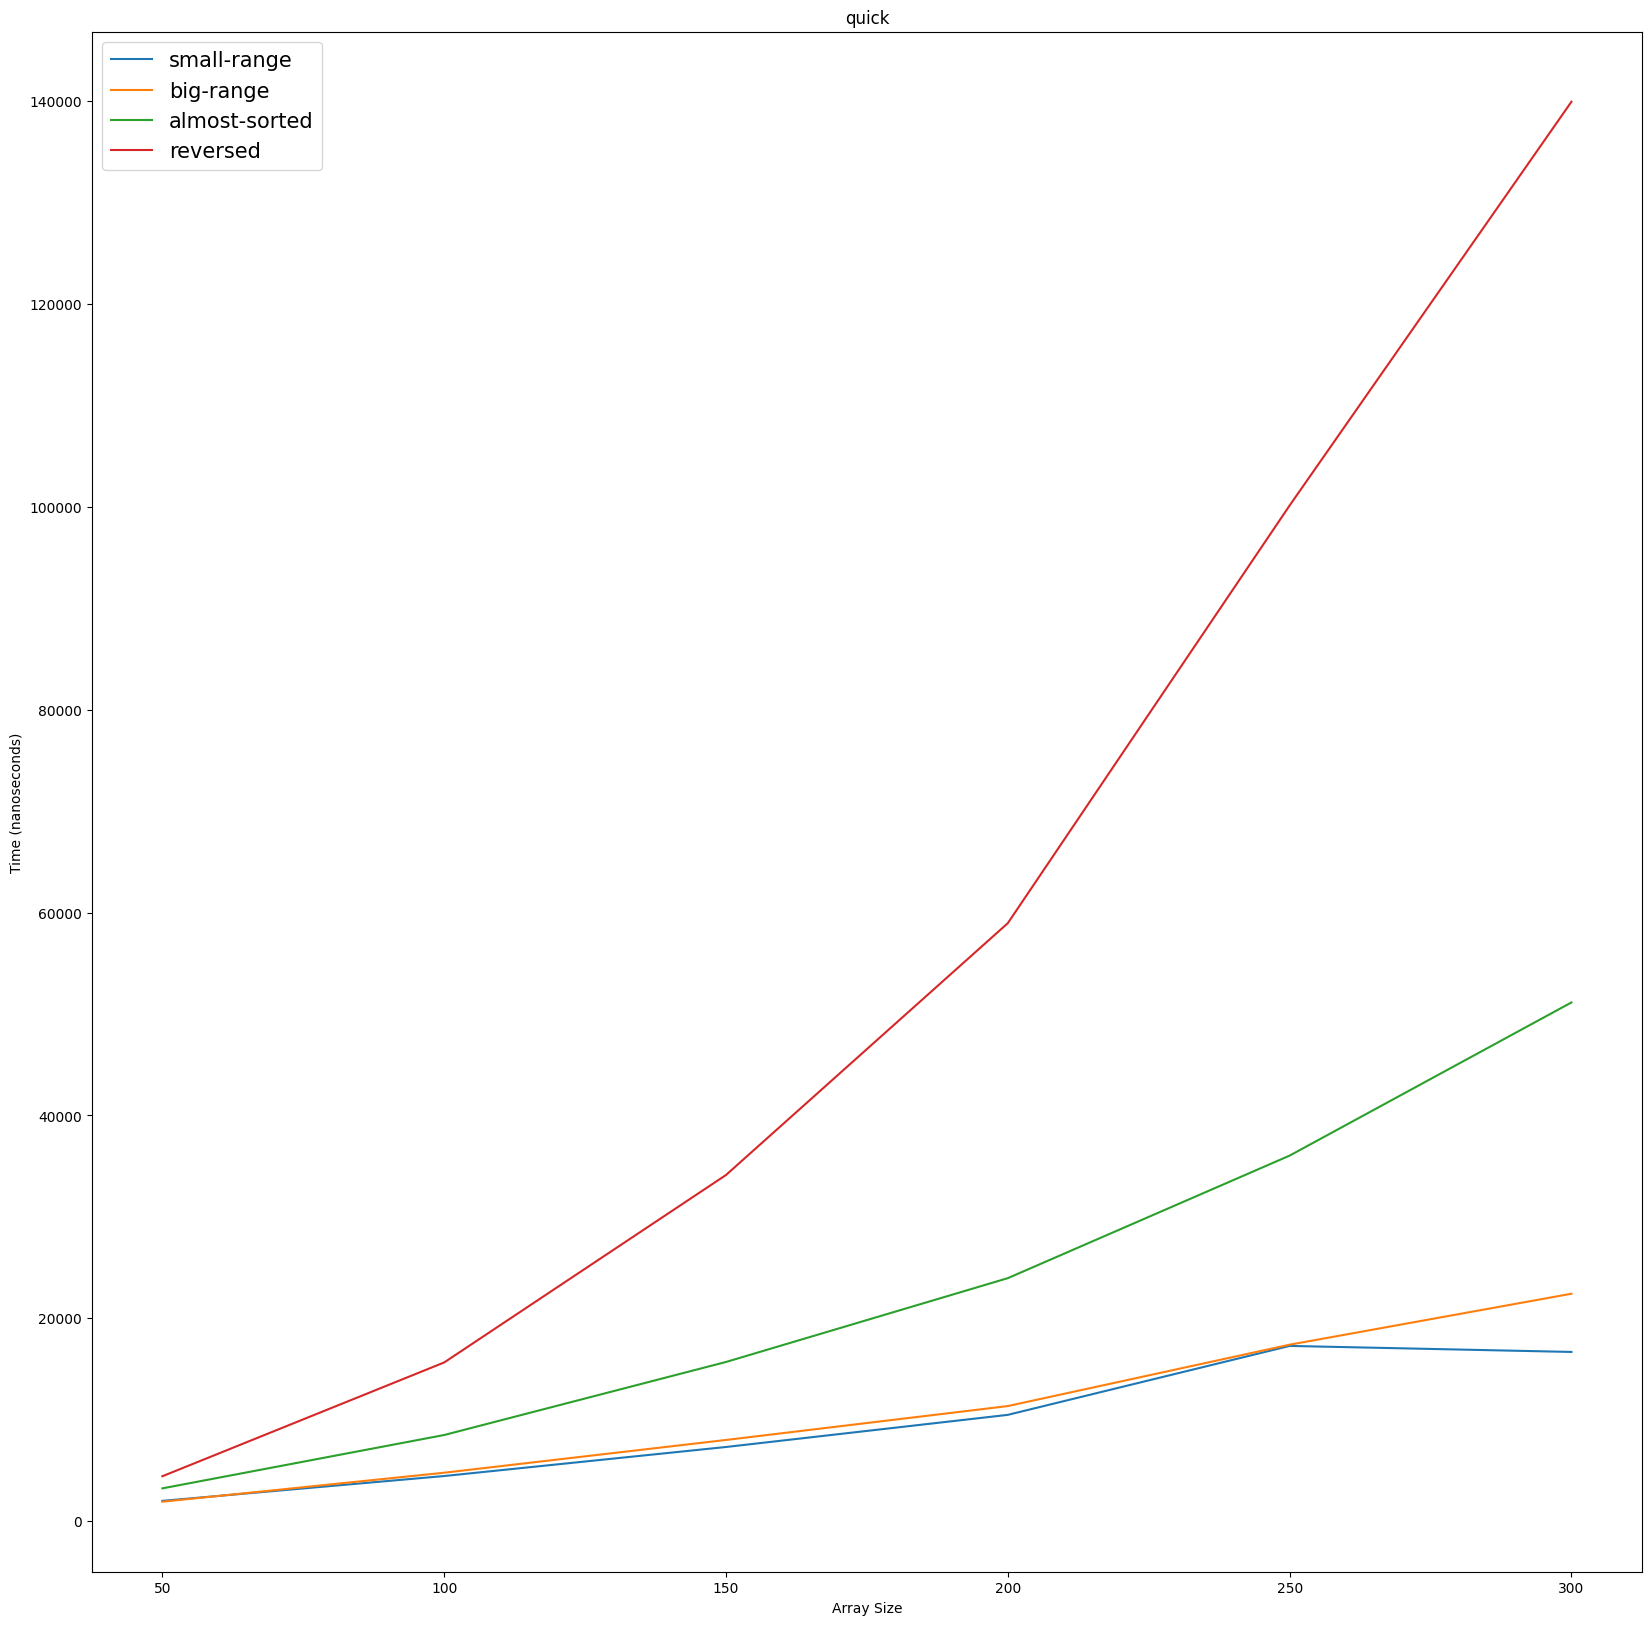

In [15]:
print_sort(data, sorts[9])

**Вывод:** логично, что для случайного набора сортировка стремится к nlogn, а для отсортированного/почти отсортированного вырождается в квадрат, потому что мы делаем первый элемент опорным и вместо деления на 2 вероятностно равные части получаем "бамбук"

### 11. Пирамидальная

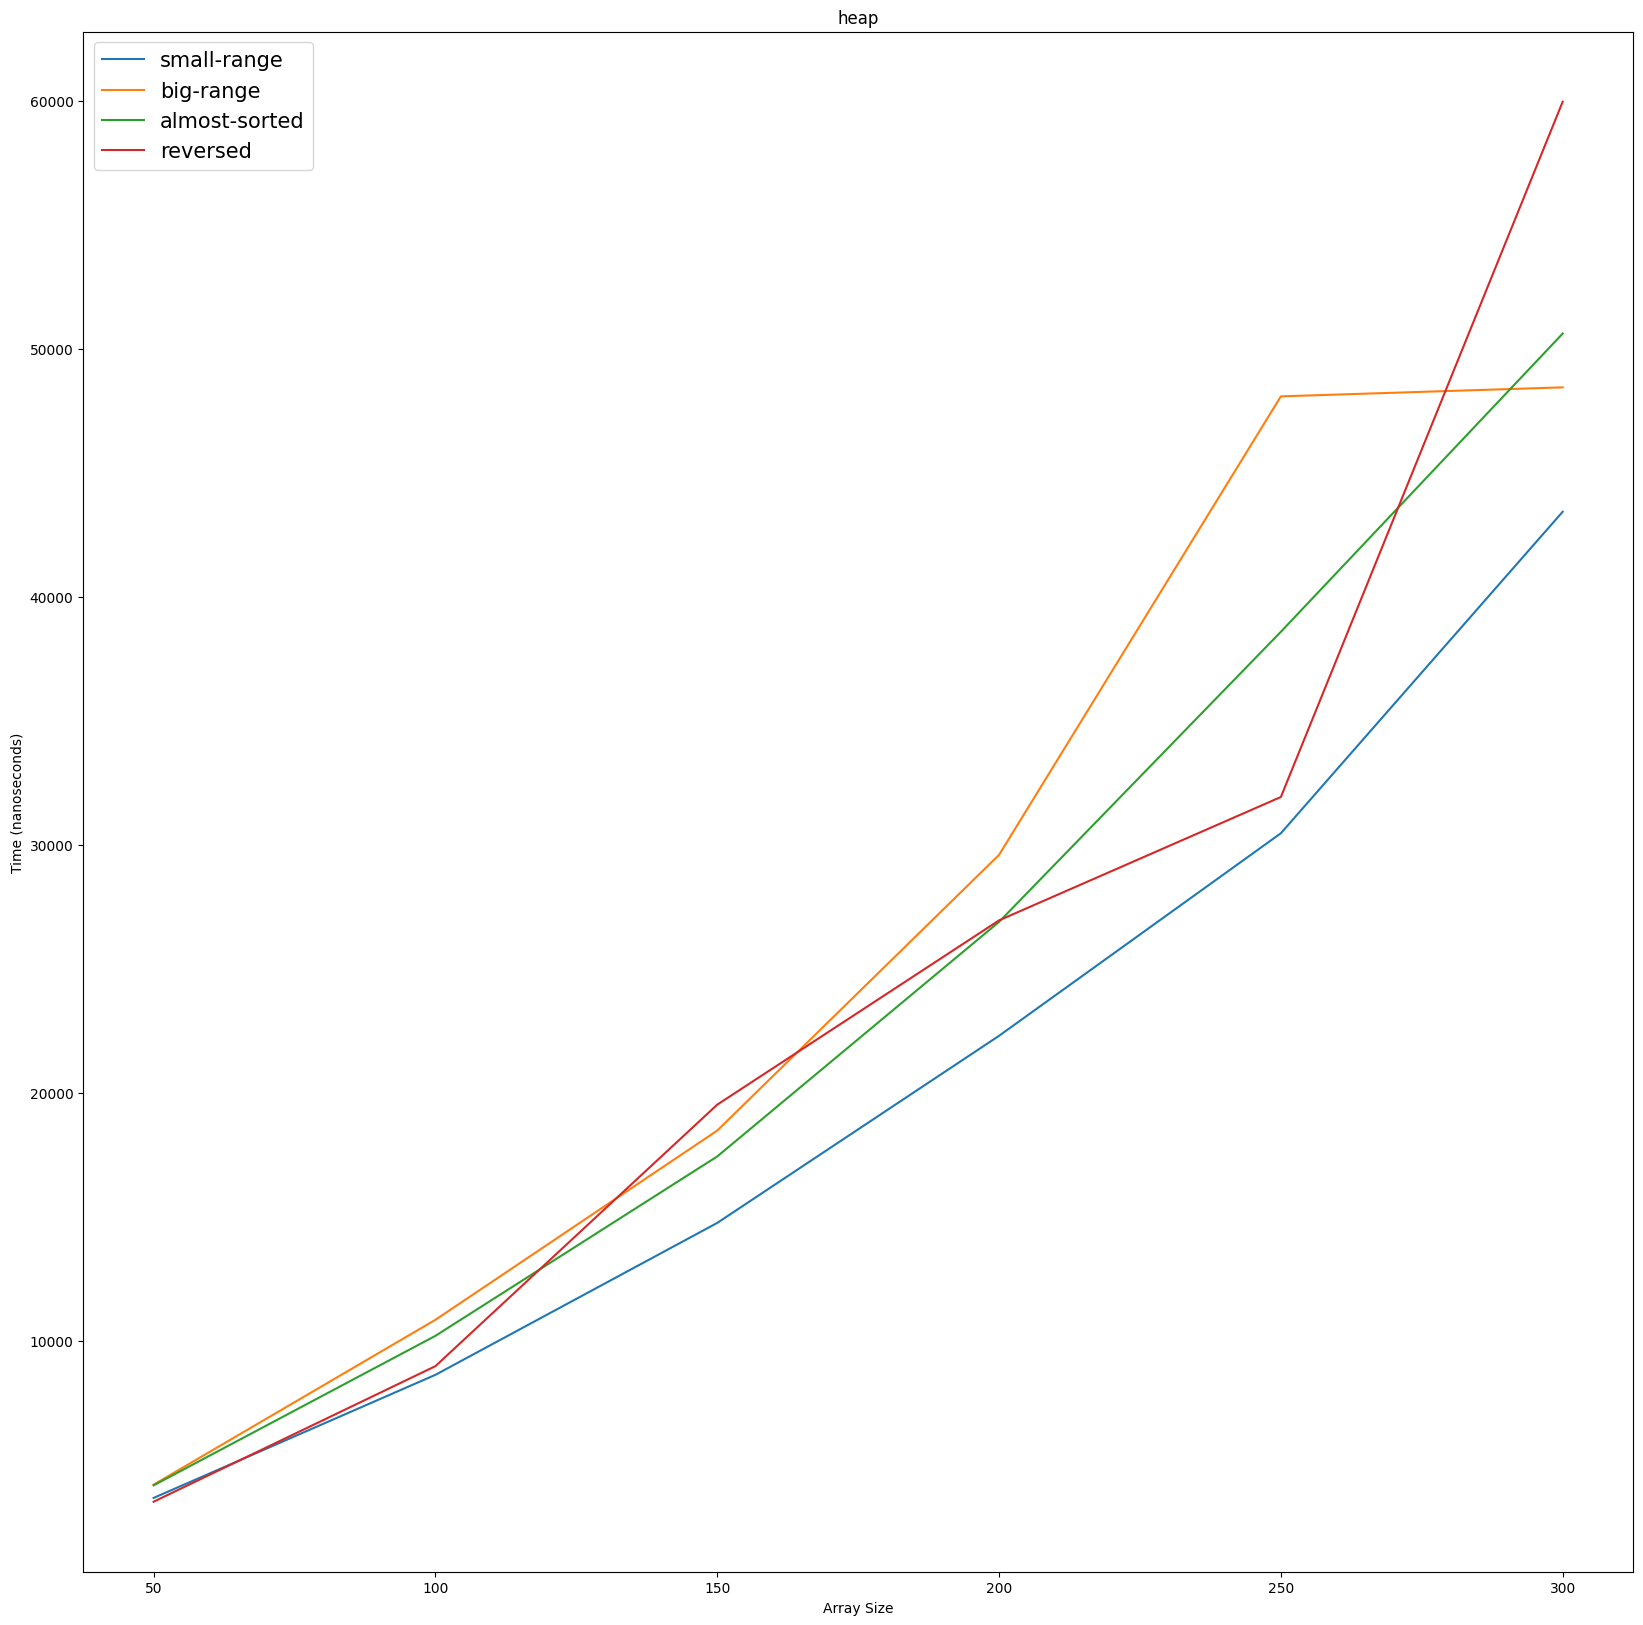

In [16]:
print_sort(data, sorts[10])

**Вывод:** диапазон значений немного влияет на сортировку, потому что в алгоритме `heapify` используется строгий знак для обмена значений

### 12. Шелла (последовательность Циура)

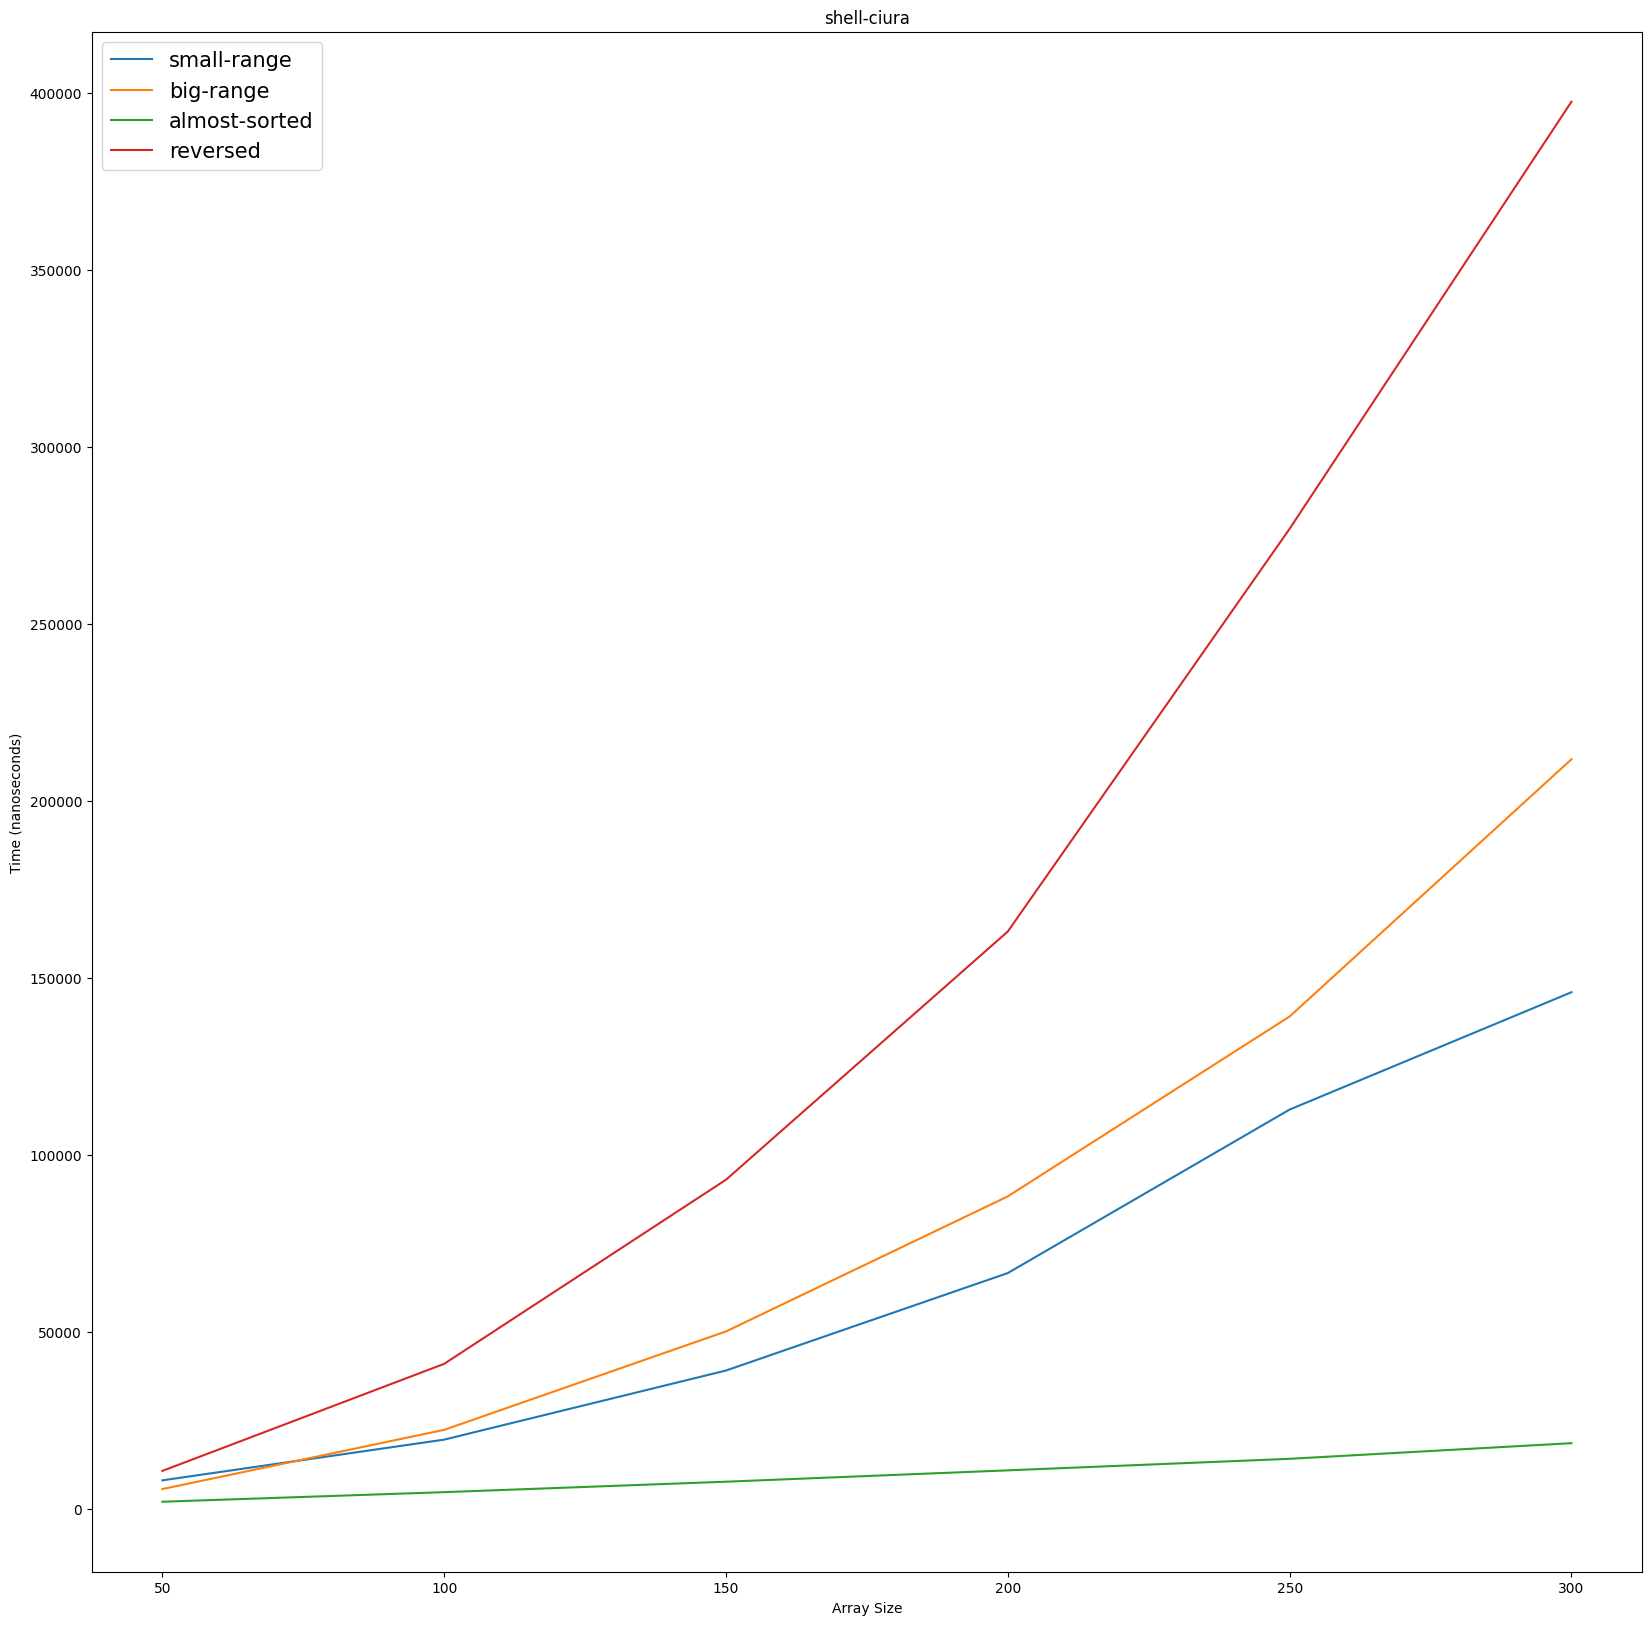

In [17]:
print_sort(data, sorts[11])

**Вывод:** последовательность подобрана для случайных массивов, поэтому они показывают среднее время, но, в частности, хороша для почти отсортированных и плоха для отсортированных в обратном порядке

### 13. Шелла (последовательность Шелла)

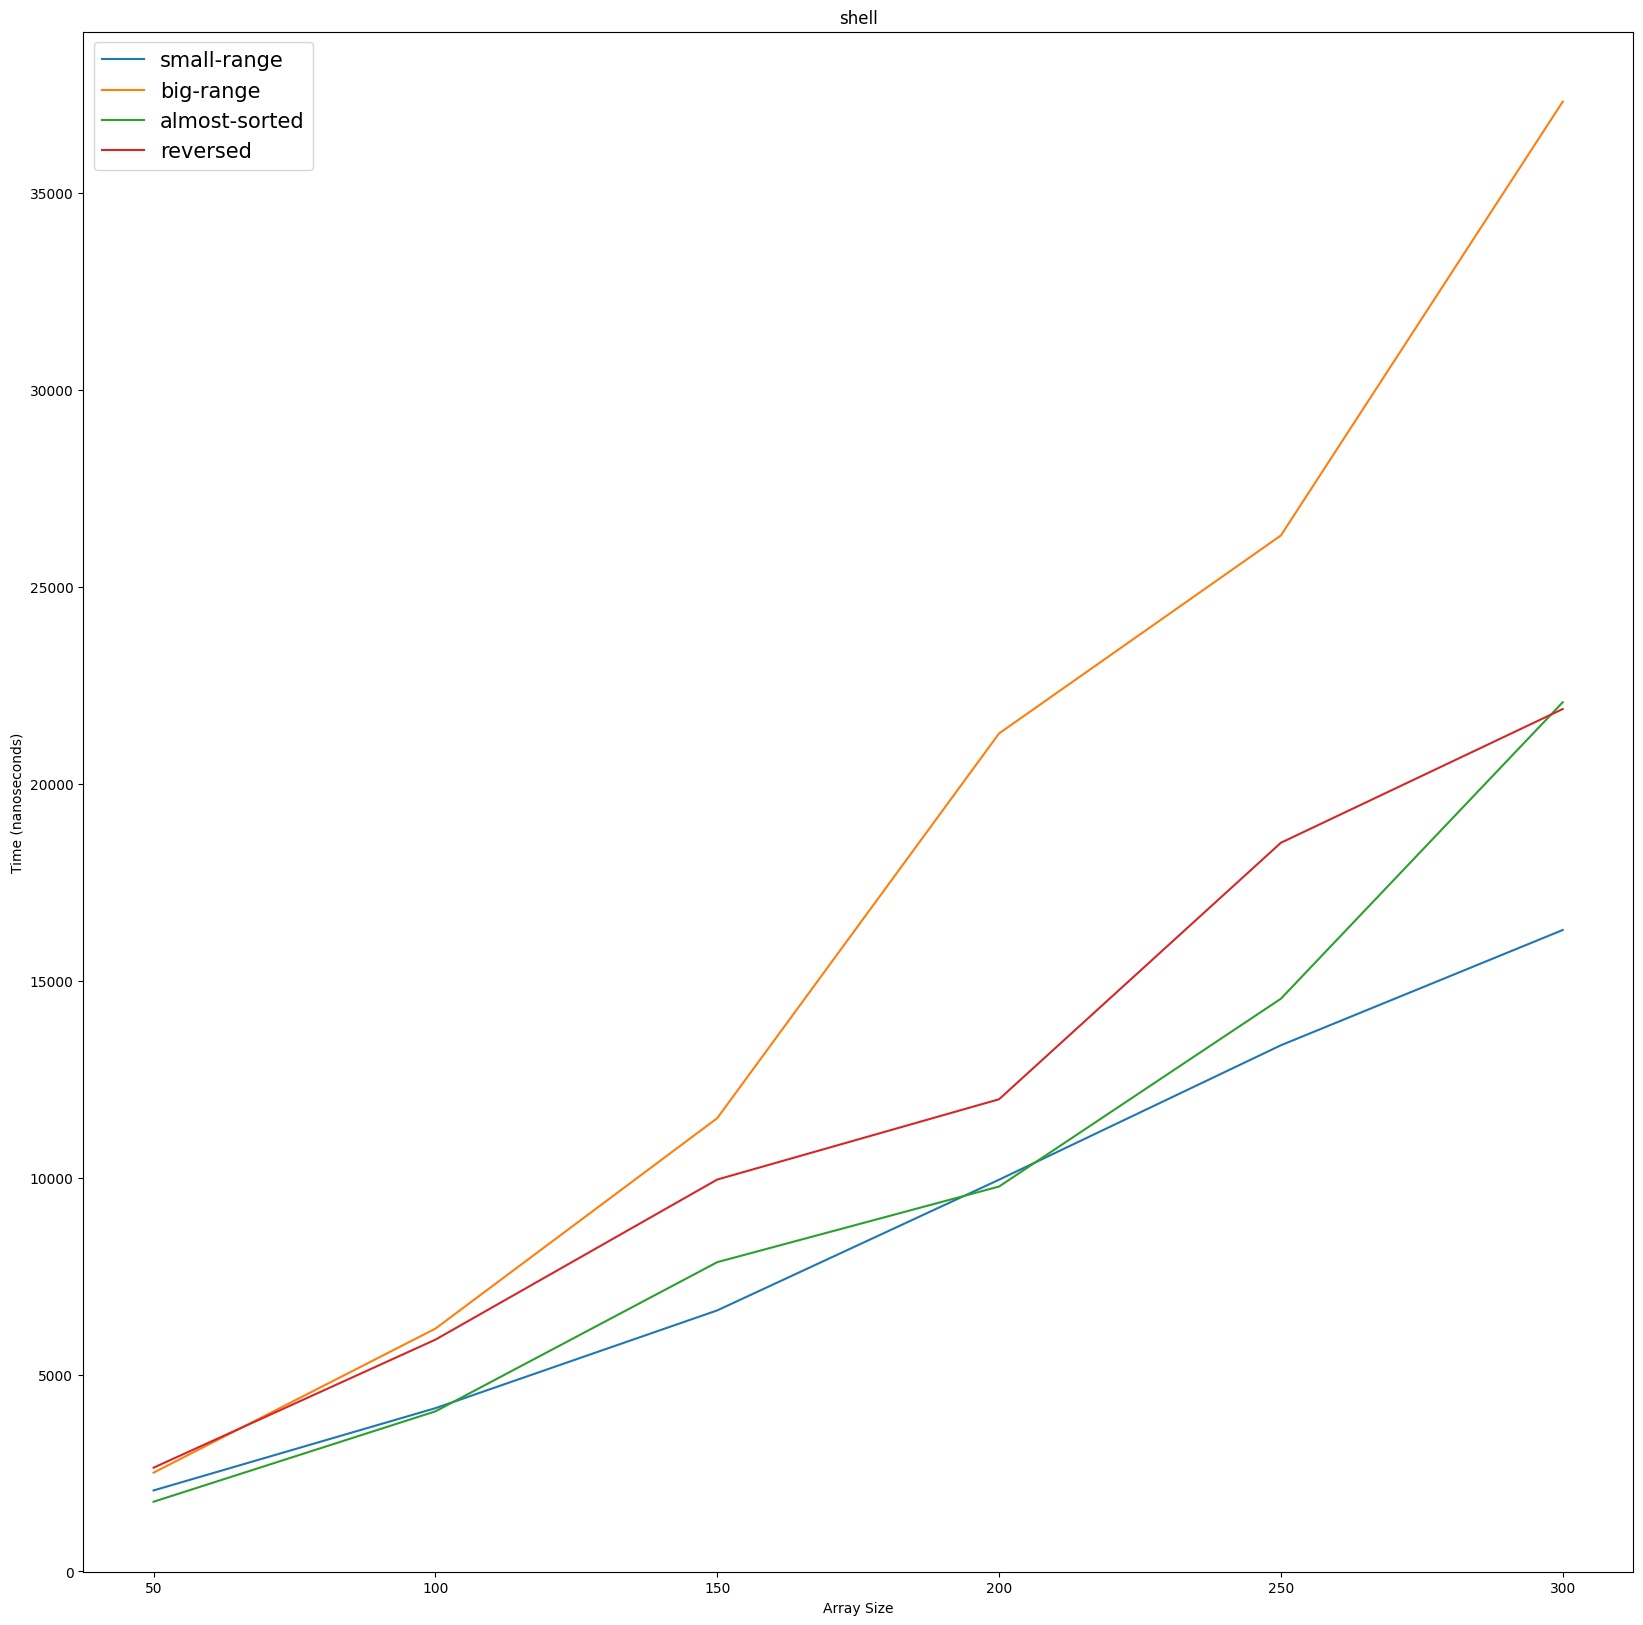

In [18]:
print_sort(data, sorts[12])

**Вывод:** диапазон значений негативно влияет на скорость сортировки, потому нам приходит чаще свопать элементы

## По массивам

### 1. Случайные числа от 0 до 5

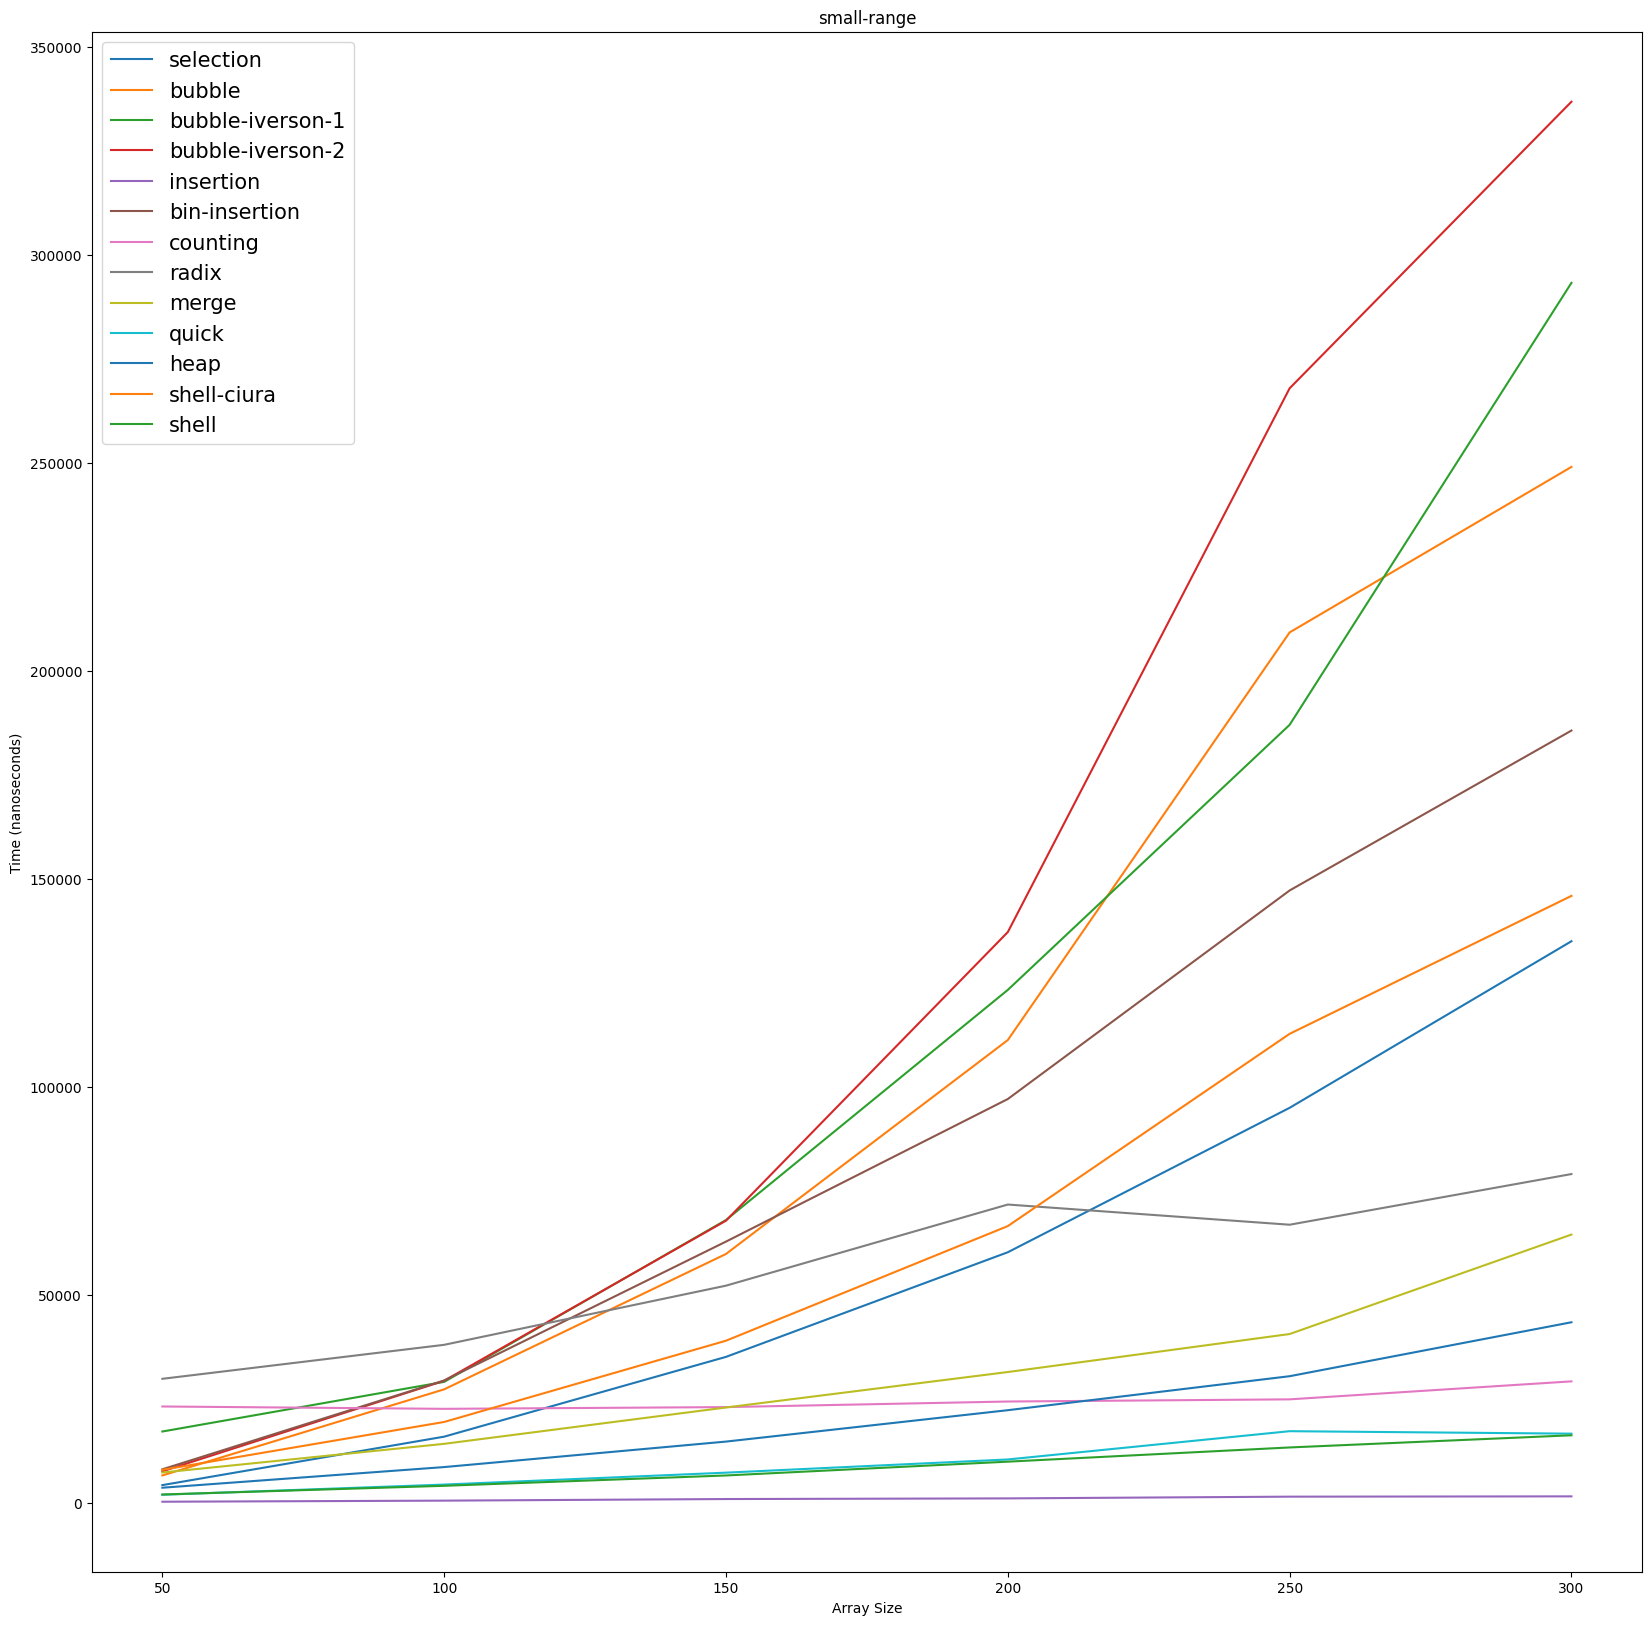

In [19]:
print_array(data, arrays[0])

**Вывод:** занятно, что хуже всех пузырёк с условием Айверсона 1+2, возможно, у меня неоптимальный алгоритм. `insertion` скорее всего выигрывает за счёт константы

### 2. Случайные числа от 0 до 4000

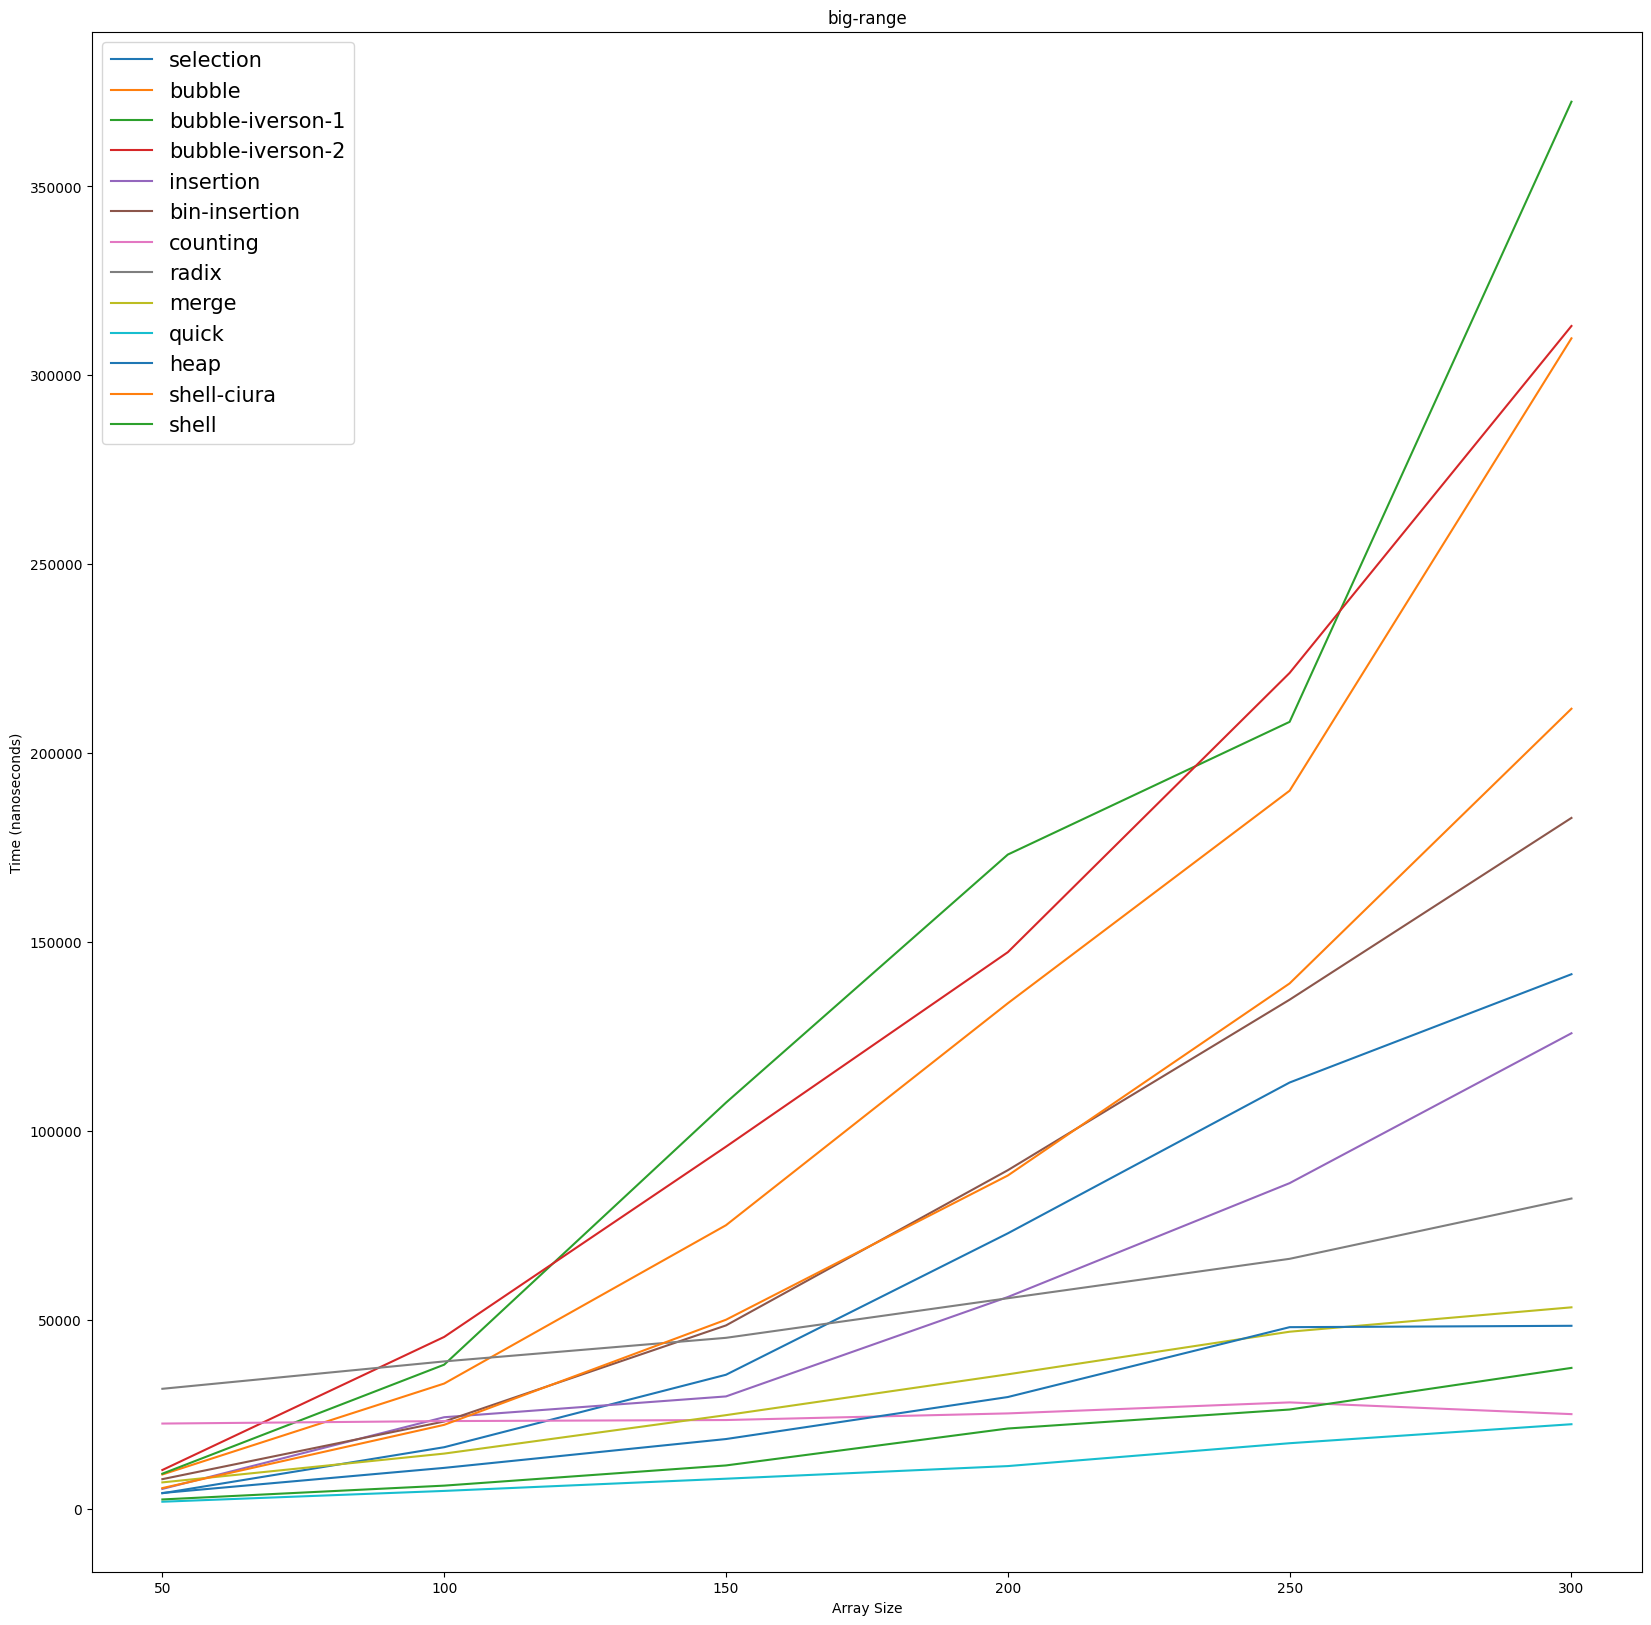

In [20]:
print_array(data, arrays[1])

**Вывод:** видимо, сгенерировался удачный массив для `quick`, потому что там константа не самая маленькая

### 3. Почти отсортированный массив

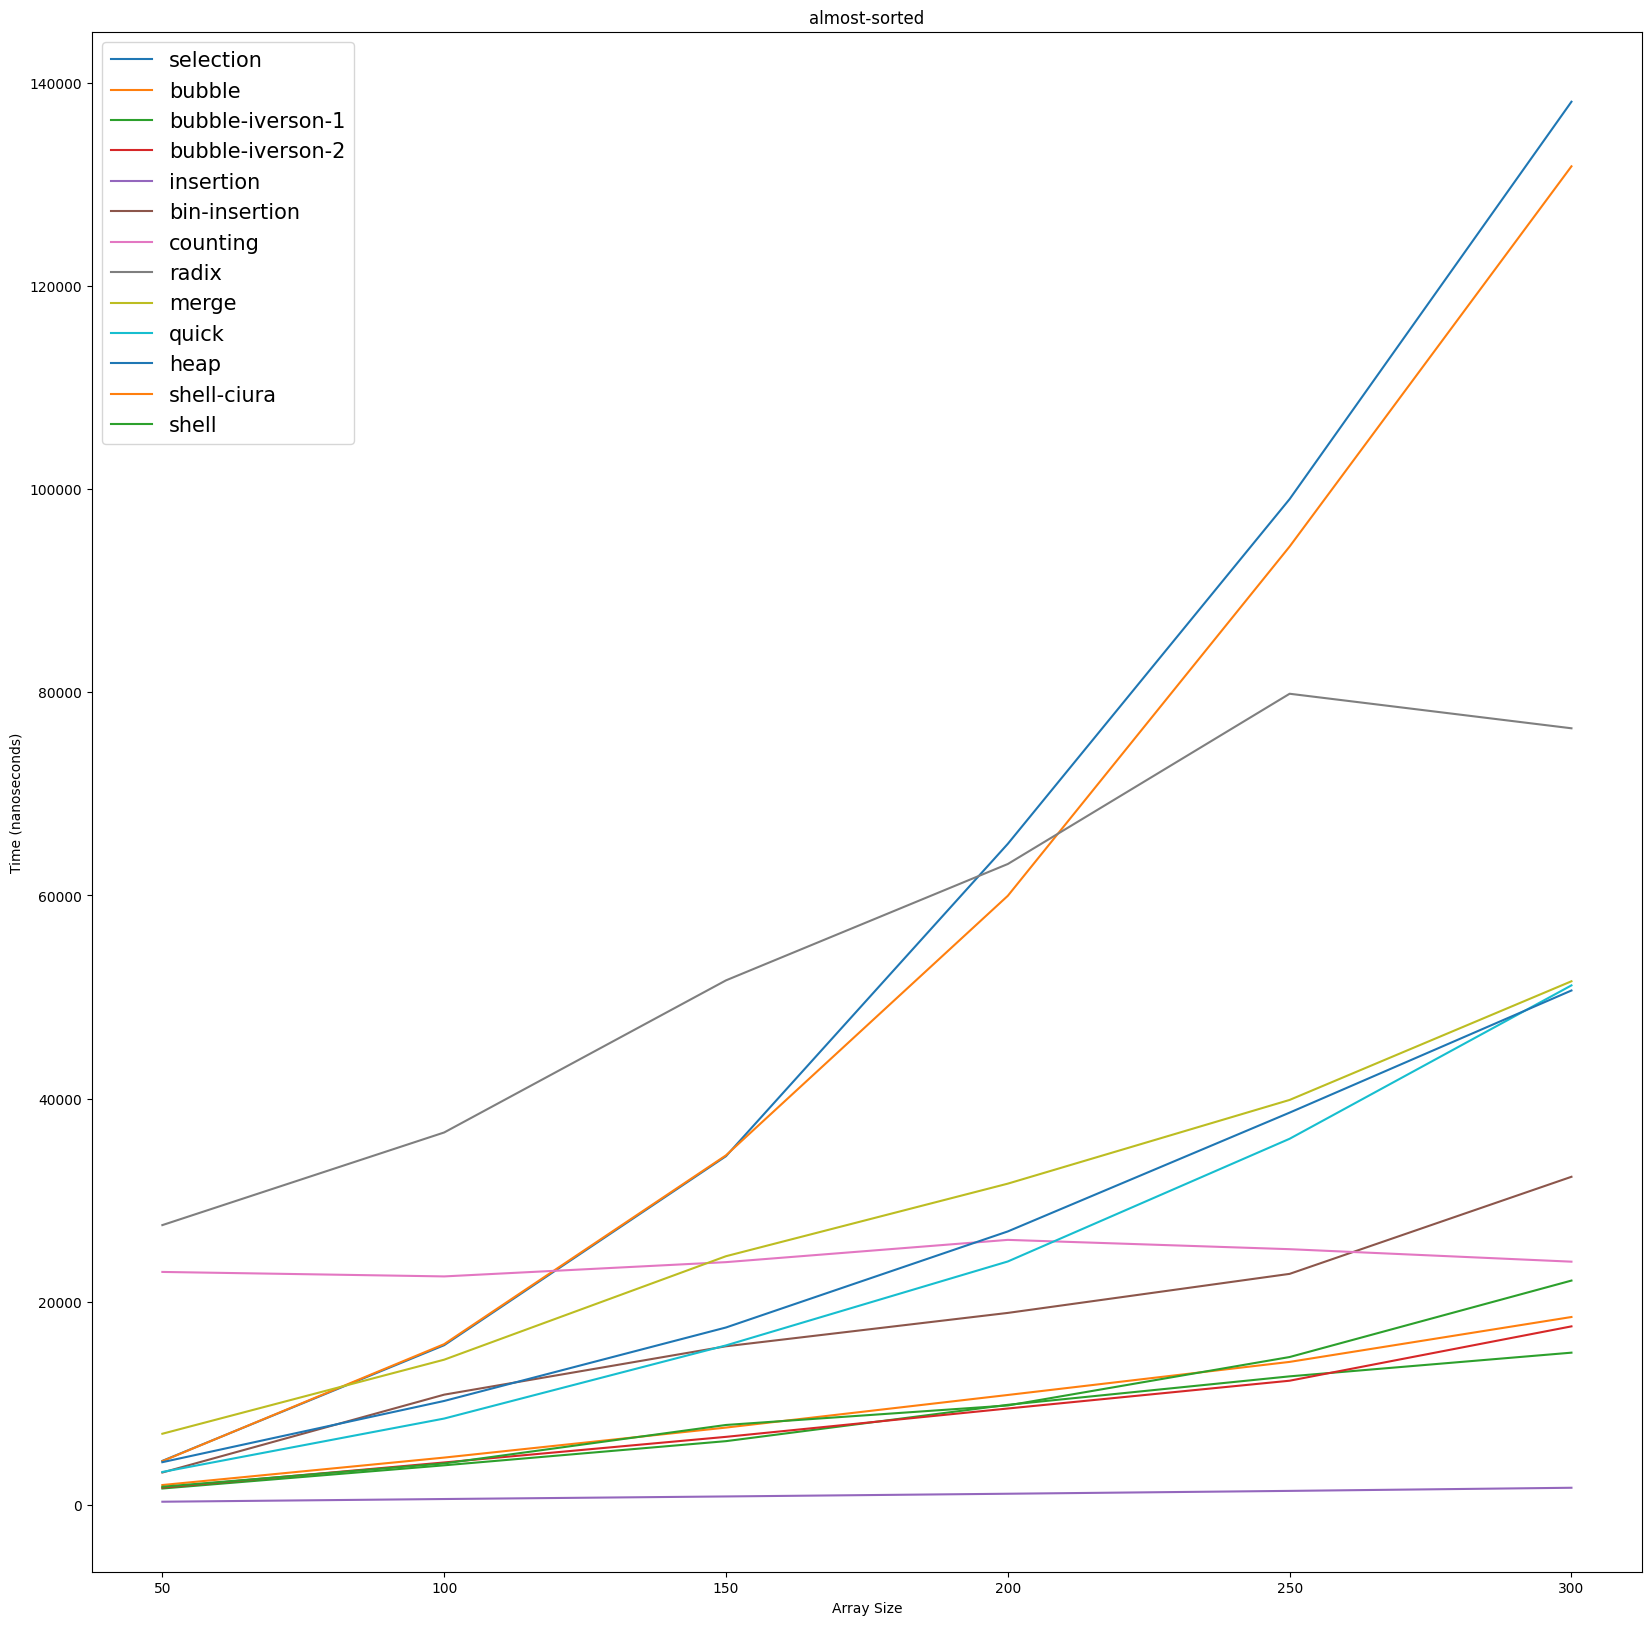

In [21]:
print_array(data, arrays[2])

**Вывод:** тут хорошо видна линейная сложность `counting` и отчасти `radix`

### 4. Отсортированный в обратном порядке массив

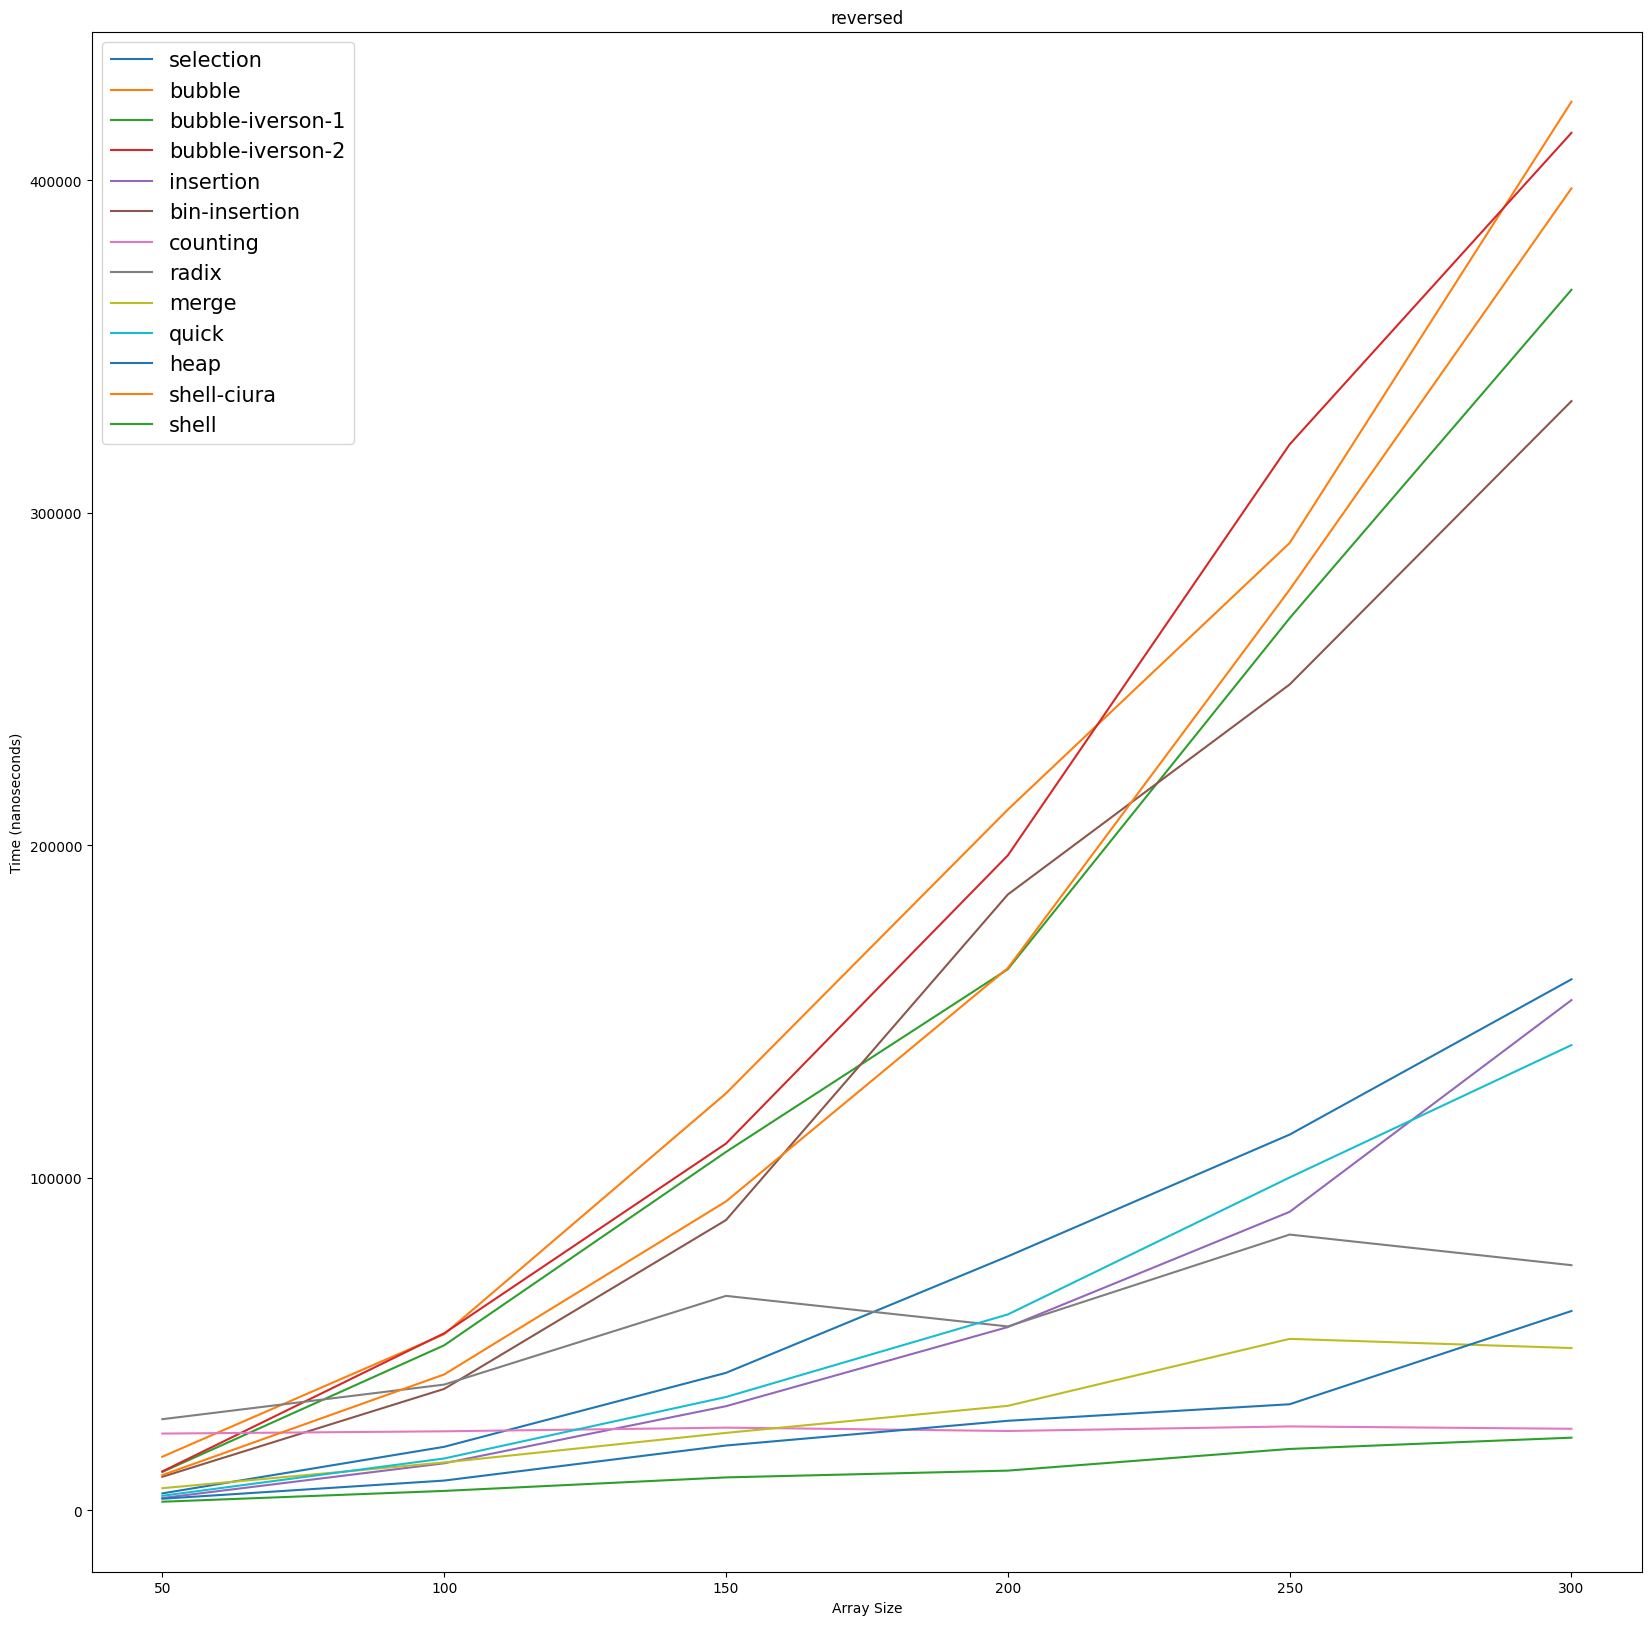

In [22]:
print_array(data, arrays[3])

**Вывод:** здесь можно отметить чувствительные к порядку элементов сортировки